# Apertura del dataset

Descargamos el archivo .csv y lo metimos en la carpeta del tpe, luego asignamos a la variable raw_dataset

In [128]:
import pandas as pd
import wget
from wget import download
from os import path, listdir

raw_dataset = pd.read_csv("Calidad_de_agua_2023.csv", delimiter=';')

Mostramos las primeras cinco filas del dataset

In [129]:
raw_dataset.head()

,orden,sitios,codigo,fecha,año,campaña,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
0,1,Canal Villanueva y Río Luján,TI001,22/2/2023,2023,Verano,26,24,6.59,7.24,Ausencia,Ausencia,Ausencia,Presencia,600,100,130,3.9,<0.05,0.26,<0.10,<2.0,<30,29,<0.10,<0.005,<0.001,0.87,<0.15,53,Muy deteriorada
1,1,Canal Villanueva y Río Luján,TI001,10/5/2023,2023,otoño,18,12,7.09,7.22,Ausencia,Ausencia,Ausencia,Ausencia,3200,2200,770,3.90,0.30,0.16,0.15,<2.0,<30,45.00,<0.10,<0.005,<1.0,2.56,<0.15,39,Extremadamente deteriorada
2,1,Canal Villanueva y Río Luján,TI001,23/8/2023,2023,invierno,16.3,11,8.53,7.27,Ausencia,Ausencia,Ausencia,Presencia,240,200,300,4.2,0.19,0.57,<0.20,<2.0,<30,38,<0.10,<0.005,<0.001,1.02,<0.15,48,Muy deteriorada
3,1,Canal Villanueva y Río Luján,TI001,14/11/2023,2023,primavera,23,25,4.72,6.57,Ausencia,Ausencia,Ausencia,Ausencia,200,180,290,3.3,0.13,0.12,<0.20,<2.0,<30,24,<0.10,<0.005,<0.001,<10.00,<0.15,42,Extremadamente deteriorada
4,2,Río Lujan y Arroyo Caraguatá,TI006,22/2/2023,2023,Verano,26.8,25,5.94,6.96,Ausencia,Ausencia,Ausencia,Presencia,1000,400,1.500,5.2,0.25,0.16,0.11,2.1,<30,24,<0.10,<0.005,<0.001,10.61,0.21,39,Extremadamente deteriorada


Mostramos los tipos de los atributos del dataset

In [130]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   orden                    169 non-null    int64 
 1   sitios                   169 non-null    object
 2   codigo                   169 non-null    object
 3   fecha                    169 non-null    object
 4   año                      169 non-null    int64 
 5   campaña                  169 non-null    object
 6   tem_agua                 169 non-null    object
 7   tem_aire                 169 non-null    object
 8   od                       169 non-null    object
 9   ph                       168 non-null    object
 10  olores                   169 non-null    object
 11  color                    169 non-null    object
 12  espumas                  169 non-null    object
 13  mat_susp                 169 non-null    object
 14  colif_fecales_ufc_100ml  169 non-null    o

Mostramos el count, mean, std, min, 25%, 50%, 75% y max de los atributos numericos del dataset sin limpiar los datos.

In [131]:
raw_dataset.describe()

,orden,año
count,169.000000,169.0
mean,21.627219,2023.0
std,12.233228,0.0
min,1.000000,2023.0
25%,11.000000,2023.0
50%,22.000000,2023.0
75%,32.000000,2023.0
max,43.000000,2023.0


# Limpieza del dataset

## borrar columnas innecesarias

Comenzamos a limpiar el dataset, empezando por hacer una copia del dataset sin procesar para guardar la version original.
Luego continuamos por eliminar la columna 'orden' ya que actua como un indice y no nos da informacion, tambien eliminamos la columna 'año' ya que no nos otroga informacion nueva dado que en 'fecha' esta incluido el año de muestreo.
luego volvemos a imprimir las primeras cinco filas.

In [132]:
dataset = raw_dataset.copy()
dataset = dataset.drop('orden', axis=1)
dataset = dataset.drop('año', axis=1)
dataset.head()

,sitios,codigo,fecha,campaña,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
0,Canal Villanueva y Río Luján,TI001,22/2/2023,Verano,26,24,6.59,7.24,Ausencia,Ausencia,Ausencia,Presencia,600,100,130,3.9,<0.05,0.26,<0.10,<2.0,<30,29,<0.10,<0.005,<0.001,0.87,<0.15,53,Muy deteriorada
1,Canal Villanueva y Río Luján,TI001,10/5/2023,otoño,18,12,7.09,7.22,Ausencia,Ausencia,Ausencia,Ausencia,3200,2200,770,3.90,0.30,0.16,0.15,<2.0,<30,45.00,<0.10,<0.005,<1.0,2.56,<0.15,39,Extremadamente deteriorada
2,Canal Villanueva y Río Luján,TI001,23/8/2023,invierno,16.3,11,8.53,7.27,Ausencia,Ausencia,Ausencia,Presencia,240,200,300,4.2,0.19,0.57,<0.20,<2.0,<30,38,<0.10,<0.005,<0.001,1.02,<0.15,48,Muy deteriorada
3,Canal Villanueva y Río Luján,TI001,14/11/2023,primavera,23,25,4.72,6.57,Ausencia,Ausencia,Ausencia,Ausencia,200,180,290,3.3,0.13,0.12,<0.20,<2.0,<30,24,<0.10,<0.005,<0.001,<10.00,<0.15,42,Extremadamente deteriorada
4,Río Lujan y Arroyo Caraguatá,TI006,22/2/2023,Verano,26.8,25,5.94,6.96,Ausencia,Ausencia,Ausencia,Presencia,1000,400,1.500,5.2,0.25,0.16,0.11,2.1,<30,24,<0.10,<0.005,<0.001,10.61,0.21,39,Extremadamente deteriorada


## Encontrar discernibles, corregir tipo y variaciones

Mostramos la cantidad de nulos en cada atributo del dataset.
Podemos notar que, seguramente, hay otra variable que reemplaza a los NaN

In [133]:
dataset.isna().sum()

sitios                      0
codigo                      0
fecha                       0
campaña                     0
tem_agua                    0
tem_aire                    0
od                          0
ph                          1
olores                      0
color                       0
espumas                     0
mat_susp                    0
colif_fecales_ufc_100ml     0
escher_coli_ufc_100ml       0
enteroc_ufc_100ml           0
nitrato_mg_l                0
nh4_mg_l                    0
p_total_l_mg_l              1
fosf_ortofos_mg_l           0
dbo_mg_l                    1
dqo_mg_l                    0
turbiedad_ntu               0
hidr_deriv_petr_ug_l        0
cr_total_mg_l               0
cd_total_mg_l               0
clorofila_a_ug_l            0
microcistina_ug_l           0
ica                         1
calidad_de_agua            15
dtype: int64

### Sitios

Para encontrar estos discernibles debemos analizar las frecuencias absolutas de cada valor columna por columna. Comenzamos por la columna 'sitios'.

In [134]:
#Como pandas no nos muestra todos los valores y no tenemos certeza de que no exista un descernible que no estemos viendo, 
#imprimimos uno por uno
for idx, val in dataset["sitios"].value_counts().items():
  print(idx, val)

Canal Villanueva y Río Luján 4
Río Lujan y Arroyo Caraguatá 4
Canal Aliviador y Río Lujan 4
Río Carapachay y Arroyo Gallo Fiambre 4
Río Reconquista y Río Lujan 4
Rio Tigre 100m antes del Rio Luján 4
Río Lujan y Canal San Fernando 4
Río Capitán y Río San Antonio 4
Arroyo Abra Vieja y Santa Rosa 4
Del Arca 4
Espigón La Farola 4
Reserva Ecológica 4
Playa Espigón de Pacheco 4
Perú Puente 4
Reserva Barrio El Ceibo 4
Puerto de Olivos Espigón 4
Costa y Melo 4
Parque de los Niños 4
Costanera Norte - Espigón Abanico 4
Club de Pescadores 4
Reserva Ecológica Costanera Sur - Playita 4
Escollera de Propaneros 4
Polo Petroquímico Dock Sud 4
Costa de Villa Domínico 4
Arroyo Sarandí 4
Arroyo Santo Domingo 4
Espora 400 m 4
Toma de agua Club de Pesca 4
Náutico 400 m 4
Pejerrey Club 400 m 4
Calle 14 y Costa - Salida cloaca 4
Puerto Trinidad calle 47 4
Costanera Hudson Calle 63 4
Boca Cerrada (Res.Nat. Punta Lara) 4
Camping Eva Perón 4
Diagonal 66 (descarga cloaca) 4
Arroyo El Gato 4
Ensenada Prefectura I

Podemos ver que la columna 'sitios' no contiene valores discernibles ni variaciones de un mismo valor de variable por lo tanto no tenemos que modificar nada de esta columna.

### codigo

In [135]:
for idx, val in dataset["codigo"].value_counts().items():
  print(idx, val)

TI001 4
TI006 4
TI002 4
TI003 4
TI004 4
TI005 4
TI007 4
TI008 4
TI009 4
SF015 4
SI021 4
SI022 4
SI024 4
SI023 4
VL033 4
VL032 4
VL031 4
CA041 4
CA044 4
CA046 4
CA047 4
AV054 4
AV051 4
AV052 4
AV053 4
AV055 4
QU061 4
QU062 4
BS095 4
QU063 4
BZ078 4
BZ077 4
BZ080 4
EN081 4
EN083 4
EN082 4
BS094 4
BS091 4
EN084 4
BS092 4
BS093 4
EN-adic 3
AC001 1
EN-extra 1


Pareciera que esta columna tampoco contiene valores discernibles ni variaciones de un mismo valor de variable

### fecha

In [136]:
dataset["fecha"].value_counts()

fecha
23/8/2023     43
22/2/2023     42
10/5/2023     42
14/11/2023    42
Name: count, dtype: int64

Como pudimos ver cuando hicimos raw_dataset.info(), esta columna esta definida como tipo "object" y en realidad es de tipo "date"

In [137]:
#usamos la funcion to_datetime de pandas para cambiar el tipo de la variable y aclarando el formato que teniamos en el string.
dataset['fecha'] = pd.to_datetime(dataset['fecha'], format='%d/%m/%Y')

### campaña

In [138]:
dataset["campaña"].value_counts()

campaña
invierno     43
Verano       42
otoño        42
primavera    42
Name: count, dtype: int64

### tem_agua

In [139]:
dataset["tem_agua"].value_counts()

tem_agua
18            19
22            11
17            10
sin equipo     9
23             9
              ..
12.3           1
12.9           1
22.8           1
12.6           1
12.2           1
Name: count, Length: 61, dtype: int64

Podemos observar que hay valores discernibles (que no son NaN) como por ejemplo sin equipo, no se muestreó, entre otros.
Como no nos interesa el por que no se muestreo, solo que no se sabe la temperatura del agua, cambiaremos estos valores a NaN.

In [140]:
#Cambiamos los valores discernibles
dataset['tem_agua'] = dataset['tem_agua'].replace(['sin equipo', 'no muestreó', 'no se midió', 'en obra', 'no se muestreó', 'inaccesible'], pd.NA)

#Cambiamos el tipo de la columna de "object" a "float"
dataset['tem_agua'] = pd.to_numeric(dataset['tem_agua'])

### tem_aire

In [141]:
dataset['tem_aire'].value_counts()

tem_aire
13                18
25                15
15                15
22                13
24                11
14                 8
11                 7
12                 7
no muestreó        7
28                 7
23                 7
10                 6
no se midió        5
sin equipo         5
26                 5
21                 5
no se muestreó     4
en obra            4
29                 3
20                 3
18                 3
11.3               2
16                 2
19                 2
inaccesible        2
27                 1
11.5               1
30                 1
Name: count, dtype: int64

De nuevo podemos observar que hay valores discernibles que debemos cambiar, al igual que el tipo del a columna

In [142]:
#Cambiamos los valores discernibles
dataset['tem_aire'] = dataset['tem_aire'].replace(['no muestreó', 'no se midió', 'sin equipo','no se muestreó', 'en obra', 'inaccesible'], pd.NA)

#Cambiamos el tipo de la columna de "object" a "float"
dataset['tem_aire'] = pd.to_numeric(dataset['tem_aire'])

### od

In [143]:
dataset['od'].value_counts()

od
sin equipo        12
no muestreó        7
no se midió        5
en obra            4
no se muestreó     4
                  ..
9.41               1
5.8                1
5.93               1
8.22               1
8.96               1
Name: count, Length: 130, dtype: int64

In [144]:
#Cambiamos los valores discernibles
dataset['od'] = dataset['od'].replace(['sin equipo', 'no muestreó', 'no se midió', 'en obra', 'no se muestreó', 'inaccesible', 'N/R'], pd.NA)

#Cambiamos el tipo de la columna de "object" a "float"
dataset['od'] = pd.to_numeric(dataset['od'])

### ph

In [145]:
dataset['ph'].value_counts()

ph
sin equipo     13
no muestreó     7
no se midió     5
-               4
en obra         4
               ..
8.7             1
8.67            1
8.35            1
8.30            1
8.09            1
Name: count, Length: 106, dtype: int64

In [146]:
#Cambiamos los valores discernibles
dataset['ph'] = dataset['ph'].replace(['sin equipo', 'no muestreó', 'no se midió', 'en obra', 'no se muestreó', 'inaccesible', '-', 'no funcionó'], pd.NA)

#Cambiamos el tipo de la columna de "object" a "float"
dataset['ph'] = pd.to_numeric(dataset['ph'])

### olores

In [147]:
dataset['olores'].value_counts()

olores
Ausencia          140
Presencia          11
no muestreó         7
en obra             4
no se muestreó      4
inaccesible         2
no se midió         1
Name: count, dtype: int64

In [148]:
#Cambiamos los valores discernibles
dataset['olores'] = dataset['olores'].replace(['no muestreó', 'no se midió', 'en obra', 'no se muestreó', 'inaccesible'], pd.NA)

#Cambiamos el tipo de la columna de "object" a "boolean"
dataset['olores'] = dataset['olores'].replace({'Presencia': True, 'Ausencia': False})
dataset['olores'] = dataset['olores'].astype('boolean')

### color

In [149]:
dataset['color'].value_counts()

color
Ausencia          142
Presencia           9
no muestreó         7
en obra             4
no se muestreó      4
inaccesible         2
no se midió         1
Name: count, dtype: int64

In [150]:
#Cambiamos los valores discernibles
dataset['color'] = dataset['color'].replace(['no muestreó', 'no se midió', 'en obra', 'no se muestreó', 'inaccesible'], pd.NA)

#Cambiamos el tipo de la columna de "object" a "boolean"
dataset['color'] = dataset['color'].replace({'Presencia': True, 'Ausencia': False})
dataset['color'] = dataset['color'].astype('boolean')

### espumas

In [151]:
dataset['espumas'].value_counts()

espumas
Ausencia          146
no muestreó         7
Presencia           5
en obra             4
no se muestreó      4
inaccesible         2
no se midió         1
Name: count, dtype: int64

In [152]:
#Cambiamos los valores discernibles
dataset['espumas'] = dataset['espumas'].replace(['no muestreó', 'no se midió', 'en obra', 'no se muestreó', 'inaccesible'], pd.NA)

#Cambiamos el tipo de la columna de "object" a "boolean"
dataset['espumas'] = dataset['espumas'].replace({'Presencia': True, 'Ausencia': False})
dataset['espumas'] = dataset['espumas'].astype('boolean')

#Imprimos para chequear
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   sitios                   169 non-null    object        
 1   codigo                   169 non-null    object        
 2   fecha                    169 non-null    datetime64[ns]
 3   campaña                  169 non-null    object        
 4   tem_agua                 138 non-null    float64       
 5   tem_aire                 142 non-null    float64       
 6   od                       133 non-null    float64       
 7   ph                       125 non-null    float64       
 8   olores                   151 non-null    boolean       
 9   color                    151 non-null    boolean       
 10  espumas                  151 non-null    boolean       
 11  mat_susp                 169 non-null    object        
 12  colif_fecales_ufc_100ml  169 non-nul

### mat_susp

In [153]:
dataset['mat_susp'].value_counts()

mat_susp
Ausencia          104
Presencia          47
no muestreó         7
en obra             4
no se muestreó      4
inaccesible         2
no se midió         1
Name: count, dtype: int64

In [154]:
#Cambiamos los valores discernibles
dataset['mat_susp'] = dataset['mat_susp'].replace(['no muestreó', 'no se midió', 'en obra', 'no se muestreó', 'inaccesible'], pd.NA)

#Cambiamos el tipo de la columna de "object" a "boolean"
dataset['mat_susp'] = dataset['mat_susp'].replace({'Presencia': True, 'Ausencia': False})
dataset['mat_susp'] = dataset['mat_susp'].astype('boolean')

#Imprimos para chequear
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   sitios                   169 non-null    object        
 1   codigo                   169 non-null    object        
 2   fecha                    169 non-null    datetime64[ns]
 3   campaña                  169 non-null    object        
 4   tem_agua                 138 non-null    float64       
 5   tem_aire                 142 non-null    float64       
 6   od                       133 non-null    float64       
 7   ph                       125 non-null    float64       
 8   olores                   151 non-null    boolean       
 9   color                    151 non-null    boolean       
 10  espumas                  151 non-null    boolean       
 11  mat_susp                 151 non-null    boolean       
 12  colif_fecales_ufc_100ml  169 non-nul

### colif_fecales_ufc_100ml

In [155]:
dataset['colif_fecales_ufc_100ml'].value_counts()

colif_fecales_ufc_100ml
1000           8
4000           8
2000           7
no muestreó    7
sin muestra    6
              ..
41000          1
32000          1
52000          1
81000          1
1.100          1
Name: count, Length: 81, dtype: int64

In [156]:
#Cambiamos los valores discernibles
dataset['colif_fecales_ufc_100ml'] = dataset['colif_fecales_ufc_100ml'].replace(['sin muestra', 'no muestreó', 'no se midió', 'en obra', 'no se muestreó', 'inaccesible', 'envase sin muestra'], pd.NA)

#Cambiamos el tipo de la columna de "object" a "float"
dataset['colif_fecales_ufc_100ml'] = pd.to_numeric(dataset['colif_fecales_ufc_100ml'])


### escher_coli_ufc_100ml

In [157]:
dataset['escher_coli_ufc_100ml'].value_counts()

escher_coli_ufc_100ml
400            9
500            7
2000           7
no muestreó    7
100            6
              ..
15600          1
11200          1
75000          1
700            1
300            1
Name: count, Length: 90, dtype: int64

In [158]:
#Cambiamos los valores discernibles
dataset['escher_coli_ufc_100ml'] = dataset['escher_coli_ufc_100ml'].replace(['sin muestra', 'no muestreó', 'no se midió', 'en obra', 'no se muestreó', 'inaccesible', 'envase sin muestra'], pd.NA)

#Cambiamos el tipo de la columna de "object" a "float"
dataset['escher_coli_ufc_100ml'] = pd.to_numeric(dataset['escher_coli_ufc_100ml'])

### enteroc_ufc_100ml

In [159]:
dataset['enteroc_ufc_100ml'].value_counts()

enteroc_ufc_100ml
300            8
no muestreó    7
sin muestra    6
200            5
3000           4
              ..
1960           1
280            1
18400          1
850            1
720            1
Name: count, Length: 90, dtype: int64

In [160]:
#Cambiamos los valores discernibles
dataset['enteroc_ufc_100ml'] = dataset['enteroc_ufc_100ml'].replace(['sin muestra', 'no muestreó', 'no se midió', 'en obra', 'no se muestreó', 'inaccesible', 'envase sin muestra'], pd.NA)

#Cambiamos el tipo de la columna de "object" a "float"
dataset['enteroc_ufc_100ml'] = pd.to_numeric(dataset['enteroc_ufc_100ml'])

### nitrato_mg_l

In [161]:
for idx, val in dataset["nitrato_mg_l"].value_counts().items():
  print(idx, val)

<2.0 12
<44 8
no muestreó 7
en obra 4
2.9 4
2.8 4
no se muestreó 4
4.20 3
2.7 3
7.3 3
3.7 3
6.20 2
2.5 2
3.1 2
13.9 2
3.4 2
5.30 2
2.3 2
12.7 2
9.9 2
10.5 2
5.3 2
4.3 2
4.2 2
3.3 2
3.9 2
2.4 2
5.6 2
inaccesible 2
10.6 2
4.30 1
20.2 1
9.60 1
23.1 1
3.5 1
6.3 1
5.2 1
6.70 1
3.90 1
18.6 1
4.80 1
15.2 1
20.00 1
no se midió 1
5.0 1
39.4 1
6.90 1
5.5 1
8.6 1
2.6 1
2.1 1
3.10 1
5.1 1
15.7 1
16 1
8.80 1
5.8 1
16.9 1
11 1
5.4 1
9.30 1
16.7 1
5.80 1
3.6 1
8.50 1
10.20 1
13.8 1
11.7 1
8.90 1
15.20 1
13.3 1
14.4 1
10.1 1
8.70 1
9.2 1
3.00 1
7 1
7.6 1
6.9 1
10.00 1
8.9 1
2.70 1
9.0 1
7.7 1
16.70 1
7.00 1
6.10 1
4.5 1
3.8 1
6.30 1
5.10 1
11.2 1
6.1 1
6.4 1
11.60 1
6.5 1
5.50 1
20.7 1
10.7 1
22.50 1
21.50 1
6.6 1
3.2 1
3.70 1
4.1 1
5.7 1


Podemos observar que hay valores presentes en la columna que son objects dado que aparecen como "< x", por lo tanto los cambiamos a la mitad de su valor numérico, una aproximación que decidimos hacer para facilitar el analisis. De todas formas, debemos tener en cuenta la información original.

In [162]:
#Cambiamos los valores discernibles
dataset['nitrato_mg_l'] = dataset['nitrato_mg_l'].replace(['no muestreó', 'no se midió', 'en obra', 'no se muestreó', 'inaccesible'], pd.NA)

#Los registros que muestran nitrato <44 no nos dicen informacion ya que todos los demas valores son menores a 44. Por lo tanto, los eliminamos.
dataset['nitrato_mg_l'] = dataset['nitrato_mg_l'].replace(['<44'], pd.NA)

#Los registros que muestran nitrato <2.0 los modificamos a un valor numerico que aproximamos con la finalidad de cambiar el tipo de la columna a float para analizar mejor los datos.
dataset['nitrato_mg_l'] = dataset['nitrato_mg_l'].replace(['<2.0'], '1')

#Cambiamos el tipo de la columna de "object" a "float"
dataset['nitrato_mg_l'] = pd.to_numeric(dataset['nitrato_mg_l'])

### nh4_mg_l

In [163]:
dataset['nh4_mg_l'].value_counts()

nh4_mg_l
<0.05          7
no muestreó    7
0.44           4
en obra        4
0.09           4
              ..
4.40           1
3.2            1
0.57           1
0.39           1
0.42           1
Name: count, Length: 104, dtype: int64

In [164]:
#Cambiamos los valores discernibles
dataset['nh4_mg_l'] = dataset['nh4_mg_l'].replace(['no muestreó', 'no se midió', 'en obra', 'no se muestreó', 'inaccesible'], pd.NA)

#Los registros que muestran un valor <0.05 los cambiamos por el valor numerico 0.025 para facilitar el analisis
dataset['nh4_mg_l'] = dataset['nh4_mg_l'].replace(['<0.05'], '0.025')
#Los registros que muestran un valor <0.1 los cambiamos por 0.05
dataset['nh4_mg_l'] = dataset['nh4_mg_l'].replace(['<0.1'], '0.05')
#Los registros que muestran un valor <0.78 los cambiamos por 0.39
dataset['nh4_mg_l'] = dataset['nh4_mg_l'].replace(['<0.78'], '0.39')

#Cambiamos el tipo de la columna de "object" a "float"
dataset['nh4_mg_l'] = pd.to_numeric(dataset['nh4_mg_l'])


### p_total_l_mg_l

In [165]:
dataset['p_total_l_mg_l'].value_counts()

p_total_l_mg_l
0.21           7
no muestreó    7
0.20           6
0.26           5
0.44           5
              ..
0.96           1
1.7            1
0.56           1
0.79           1
3.00           1
Name: count, Length: 81, dtype: int64

In [166]:
#Cambiamos los valores discernibles
dataset['p_total_l_mg_l'] = dataset['p_total_l_mg_l'].replace(['no muestreó', 'no se midió', 'en obra', 'no se muestreó', 'inaccesible'], pd.NA)

#Los registros que muestran un valor <0.10 los cambiamos por 0.05
dataset['p_total_l_mg_l'] = dataset['p_total_l_mg_l'].replace(['<0.10'], '0.05')

#Cambiamos el tipo de la columna de "object" a "float"
dataset['p_total_l_mg_l'] = pd.to_numeric(dataset['p_total_l_mg_l'])

### fosf_ortofos_mg_l

In [167]:
dataset['fosf_ortofos_mg_l'].value_counts()

fosf_ortofos_mg_l
<0.20             34
0.20               7
no muestreó        7
0.15               5
0.18               5
0.17               5
0.36               4
0.25               4
en obra            4
0.14               4
0.12               4
0.23               4
no se muestreó     4
sin muestra        4
<0.10              4
0.4                3
0.28               3
0.53               3
0.21               3
0.24               3
0.34               3
0.60               2
0.19               2
0.11               2
inaccesible        2
0.55               2
0.29               2
0.51               2
0.30               2
0.48               2
0.31               2
0.33               2
0.16               2
0.32               2
0.13               2
0.56               2
0.26               2
0.42               2
0.10               1
0.46               1
0.37               1
0.64               1
0.65               1
0.35               1
0.61               1
0.57               1
no se midió     

In [168]:
#Cambiamos los valores discernibles
dataset['fosf_ortofos_mg_l'] = dataset['fosf_ortofos_mg_l'].replace(['sin muestra','no muestreó', 'no se midió', 'en obra', 'no se muestreó', 'inaccesible'], pd.NA)

#Los registros que muestran un valor <0.20 los cambiamos por 0.1 para facilitar el analisis
dataset['fosf_ortofos_mg_l'] = dataset['fosf_ortofos_mg_l'].replace(['<0.20'], '0.1')
#Los registros que muestran un valor <0.10 los cambiamos por 0.05
dataset['fosf_ortofos_mg_l'] = dataset['fosf_ortofos_mg_l'].replace(['<0.10'], '0.05')

#Cambiamos el tipo de la columna de "object" a "float"
dataset['fosf_ortofos_mg_l'] = pd.to_numeric(dataset['fosf_ortofos_mg_l'])

### dbo_mg_l

In [169]:
dataset['dbo_mg_l'].value_counts()

dbo_mg_l
<2.0           40
no muestreó     7
4.1             5
3.8             4
4.3             4
               ..
4.80            1
5.50            1
23              1
3.7             1
2.10            1
Name: count, Length: 70, dtype: int64

In [170]:
#Cambiamos los valores discernibles
dataset['dbo_mg_l'] = dataset['dbo_mg_l'].replace(['no muestreó', 'no se midió', 'en obra', 'no se muestreó', 'inaccesible'], pd.NA)

#Los registros que muestran un valor <2.0 los cambiamos por 1 para facilitar el analisis
dataset['dbo_mg_l'] = dataset['dbo_mg_l'].replace(['<2.0'], '1')
#Los registros que muestran un valor <5 los cambiamos por 2.5
dataset['dbo_mg_l'] = dataset['dbo_mg_l'].replace(['<5'], '2.5')

#Cambiamos el tipo de la columna de "object" a "float"
dataset['dbo_mg_l'] = pd.to_numeric(dataset['dbo_mg_l'])

### dqo_mg_l

In [171]:
dataset['dqo_mg_l'].value_counts()

dqo_mg_l
<30               93
<50                8
no muestreó        7
40                 6
59                 4
en obra            4
no se muestreó     4
38                 3
32                 3
37                 3
76                 2
30                 2
inaccesible        2
52                 2
80                 2
53                 1
36                 1
43                 1
57                 1
33                 1
120                1
41                 1
no se midió        1
115                1
41.00              1
96                 1
36.00              1
61                 1
130                1
230                1
90                 1
65                 1
70                 1
86                 1
77                 1
66                 1
58                 1
48                 1
67                 1
Name: count, dtype: int64

In [172]:
#Cambiamos los valores discernibles
dataset['dqo_mg_l'] = dataset['dqo_mg_l'].replace(['no muestreó', 'no se midió', 'en obra', 'no se muestreó', 'inaccesible'], pd.NA)

Como hay una gran cantidad de registros que toman el valor <30 y <50, decidimos cambiar la columna a cuantitativa discreta, para agrupar en rangos en un gráfico de barras.

Decidimos crear intervalos de 30, y asumimos que el valor "<50" significa que está entre 30 y 50.

In [173]:
#Cambiamos los registros con valor '<30' por '10' para que entre en el primer intervalo
dataset['dqo_mg_l'] = dataset['dqo_mg_l'].replace(['<30'], '10')
#Cambiamos los registros con valor '<50' por 50
dataset['dqo_mg_l'] = dataset['dqo_mg_l'].replace(['<50'], '50')

#Cambiamos el tipo de la columna de object a int64
dataset['dqo_mg_l'] = pd.to_numeric(dataset['dqo_mg_l']).astype('Int64')

### turbiedad_ntu

In [174]:
dataset['turbiedad_ntu'].value_counts()

turbiedad_ntu
no muestreó    7
45.00          6
24             5
20             5
21             5
              ..
2.9            1
70             1
34             1
90             1
110            1
Name: count, Length: 79, dtype: int64

In [175]:
#Cambiamos los valores discernibles
dataset['turbiedad_ntu'] = dataset['turbiedad_ntu'].replace(['no muestreó', 'no se midió', 'en obra', 'no se muestreó', 'inaccesible'], pd.NA)

#Cambiamos el tipo de la columna de "object" a "float"
dataset['turbiedad_ntu'] = pd.to_numeric(dataset['turbiedad_ntu'])

### hidr_deriv_petr_ug_l

In [176]:
dataset['hidr_deriv_petr_ug_l'].value_counts()

hidr_deriv_petr_ug_l
<0.10             150
no muestreó         7
en obra             4
no se muestreó      4
inaccesible         2
no se midió         1
sin muestra         1
Name: count, dtype: int64

Cambiamos los valores discernibles por NaN y dejamos la columna como object ya que, al ser todos sus valores <0.10, no aporta informacion relevante para el analisis.

In [177]:
#Cambiamos los valores discernibles
dataset['hidr_deriv_petr_ug_l'] = dataset['hidr_deriv_petr_ug_l'].replace(['no muestreó', 'no se midió', 'en obra', 'no se muestreó', 'inaccesible', 'sin muestra'], pd.NA)

### cr_total_mg_l

In [178]:
dataset['cr_total_mg_l'].value_counts()

cr_total_mg_l
<0.005            126
no muestreó         7
0                   6
en obra             4
no se muestreó      4
0.005               3
0.007               3
inaccesible         2
0.006               2
7                   1
6                   1
no se midió         1
0.0051              1
0.033               1
0.0055              1
0.0078              1
0.0075              1
0.009               1
0.011               1
0.0076              1
0.008               1
Name: count, dtype: int64

In [179]:
#Cambiamos los valores discernibles
dataset['cr_total_mg_l'] = dataset['cr_total_mg_l'].replace(['no muestreó', 'no se midió', 'en obra', 'no se muestreó', 'inaccesible'], pd.NA)

#Los registros que muestran un valor <0.005 los cambiamos por 0.0025 para facilitar el analisis
dataset['cr_total_mg_l'] = dataset['cr_total_mg_l'].replace(['<0.005'], '0.0025')

#Cambiamos el tipo de la columna de "object" a "float"
dataset['cr_total_mg_l'] = pd.to_numeric(dataset['cr_total_mg_l'])

### cd_total_mg_l

In [180]:
dataset['cd_total_mg_l'].value_counts()

cd_total_mg_l
<0.001            110
<1.0               41
no muestreó         7
en obra             4
no se muestreó      4
inaccesible         2
no se midió         1
Name: count, dtype: int64

Podemos observar que los unicos valores presentes en la columna son objects dado que aparecen como "< x", por lo tanto decidimos cambiarlos al valor numerico para facilitar el analisis.

In [181]:
#Cambiamos los valores discernibles
dataset['cd_total_mg_l'] = dataset['cd_total_mg_l'].replace(['no muestreó', 'no se midió', 'en obra', 'no se muestreó', 'inaccesible'], pd.NA)


#Cambiamos los valores
dataset['cd_total_mg_l'] = dataset['cd_total_mg_l'].replace(['<0.001'], '0.0005')
dataset['cd_total_mg_l'] = dataset['cd_total_mg_l'].replace(['<1.0'], '0.5')

#Cambiamos el tipo de la columna de "object" a "float"
dataset['cd_total_mg_l'] = pd.to_numeric(dataset['cd_total_mg_l'])

### clorofila_a_ug_l

In [182]:
dataset['clorofila_a_ug_l'].value_counts()

clorofila_a_ug_l
<10.00            27
<0.10             13
no muestreó        7
no se muestreó     4
en obra            4
                  ..
8.22               1
19.25              1
54.87              1
37.4               1
45.07              1
Name: count, Length: 101, dtype: int64

In [183]:
#Cambiamos los valores discernibles
dataset['clorofila_a_ug_l'] = dataset['clorofila_a_ug_l'].replace(['no muestreó', 'no se midió', 'falto un frasco', 'no se muestreó', 'inaccesible', 'en obra'], pd.NA)

#Los registros que muestran un valor <10.00 los cambiamos por 5 para facilitar el analisis
dataset['clorofila_a_ug_l'] = dataset['clorofila_a_ug_l'].replace(['<10.00'], '5')
#Los registros que muestran un valor <0.1 los cambiamos por 0.05
dataset['clorofila_a_ug_l'] = dataset['clorofila_a_ug_l'].replace(['<0.10'], '0.05')
#Cambiamos los regitros con valor 0,05 a 0.05
dataset['clorofila_a_ug_l'] = dataset['clorofila_a_ug_l'].replace(['0,05'], '0.05')

#Cambiamos el tipo de la columna de "object" a "float"
dataset['clorofila_a_ug_l'] = pd.to_numeric(dataset['clorofila_a_ug_l'])

### microcistina_ug_l

In [184]:
dataset['microcistina_ug_l'].value_counts()

microcistina_ug_l
<0.15             106
>5.00              14
no muestreó         7
no se muestreó      4
en obra             4
0.16                3
Dato atípico        3
0.15                3
0.41                2
0.27                2
inaccesible         2
2.61                1
0.21                1
2.98                1
no se midió         1
0.99                1
0.18                1
0.2                 1
0.9                 1
0.25                1
0.17                1
0.54                1
0.58                1
0.20                1
0.19                1
0.86                1
2.42                1
0.69                1
1.18                1
0.79                1
Name: count, dtype: int64

Podemos ver que 14 registros tiene el valor ">5", por lo que decidimos cambiarlo al valor numerico '5' ya que las demas muestras no superan este valor.

In [185]:
#Cambiamos los valores discernibles
dataset['microcistina_ug_l'] = dataset['microcistina_ug_l'].replace(['no muestreó', 'no se midió', 'Dato atípico', 'no se muestreó', 'inaccesible', 'en obra'], pd.NA)

#Cambiamos los regitros con valor <0.15 a 0.075 para facilitar el analisis
dataset['microcistina_ug_l'] = dataset['microcistina_ug_l'].replace(['<0.15'], '0.075')
#Cambiamos los regitros con valor >5.00 a 5
dataset['microcistina_ug_l'] = dataset['microcistina_ug_l'].replace(['>5.00'], '5')

#Cambiamos el tipo de la columna de "object" a "float"
dataset['microcistina_ug_l'] = pd.to_numeric(dataset['microcistina_ug_l'])

### ica

In [186]:
dataset['ica'].value_counts()

ica
37                     22
35                     18
40                     16
no se pudo calcular    14
38                     13
39                     12
36                     10
34                      8
no muestreó             7
32                      5
33                      5
no se muestreó          4
29                      4
en obra                 3
45                      3
41                      3
inaccesible             2
47                      2
28                      2
31                      2
30                      2
42                      1
53                      1
48                      1
44                      1
43                      1
62                      1
59                      1
49                      1
no se midió             1
23                      1
25                      1
Name: count, dtype: int64

In [187]:
#Cambiamos los valores discernibles
dataset['ica'] = dataset['ica'].replace(['no muestreó', 'no se midió', 'en obra', 'no se muestreó', 'inaccesible', 'no se pudo calcular'], pd.NA)

#Cambiamos el tipo de la columna de "object" a "integer"
dataset['ica'] = pd.to_numeric(dataset['ica']).astype('Int64')

### calidad_de_agua

In [188]:
dataset['calidad_de_agua'].value_counts()

calidad_de_agua
Extremadamente deteriorada    127
no muestreó                     7
Muy deteriorada                 6
Muy deteriorada                 4
no se muestreó                  4
en obra                         3
inaccesible                     2
no se midió                     1
Name: count, dtype: int64

In [189]:
#Cambiamos los valores discernibles
dataset['calidad_de_agua'] = dataset['calidad_de_agua'].replace(['no muestreó', 'no se midió', 'en obra', 'no se muestreó', 'inaccesible'], pd.NA)


In [190]:
# Vemos que "Muy deteriorada" aparece dos veces porque uno tenia un espacio al final, pero es el mismo valor de variable, por lo que debemos juntarlos
dataset['calidad_de_agua'] = dataset['calidad_de_agua'].replace({'Muy deteriorada ' : 'Muy deteriorada'})
dataset['calidad_de_agua'].value_counts()

calidad_de_agua
Extremadamente deteriorada    127
Muy deteriorada                10
Name: count, dtype: int64

### Chequeo

Comprobamos que se hayan modificado correctamente los tipos y los NaN

In [191]:
# Mostramos los tipos de datos de las columnas del dataset corregido
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   sitios                   169 non-null    object        
 1   codigo                   169 non-null    object        
 2   fecha                    169 non-null    datetime64[ns]
 3   campaña                  169 non-null    object        
 4   tem_agua                 138 non-null    float64       
 5   tem_aire                 142 non-null    float64       
 6   od                       133 non-null    float64       
 7   ph                       125 non-null    float64       
 8   olores                   151 non-null    boolean       
 9   color                    151 non-null    boolean       
 10  espumas                  151 non-null    boolean       
 11  mat_susp                 151 non-null    boolean       
 12  colif_fecales_ufc_100ml  144 non-nul

In [192]:
# Mostramos la cantidad de nulos del dataset corregido
dataset.isna().sum()

sitios                      0
codigo                      0
fecha                       0
campaña                     0
tem_agua                   31
tem_aire                   27
od                         36
ph                         44
olores                     18
color                      18
espumas                    18
mat_susp                   18
colif_fecales_ufc_100ml    25
escher_coli_ufc_100ml      25
enteroc_ufc_100ml          25
nitrato_mg_l               26
nh4_mg_l                   18
p_total_l_mg_l             19
fosf_ortofos_mg_l          22
dbo_mg_l                   19
dqo_mg_l                   18
turbiedad_ntu              18
hidr_deriv_petr_ug_l       19
cr_total_mg_l              18
cd_total_mg_l              18
clorofila_a_ug_l           21
microcistina_ug_l          21
ica                        32
calidad_de_agua            32
dtype: int64

## Filas repetidas

Ahora continuamos con la limpieza fijandonos que no haya muestras repetidas

In [193]:
# contamos la cantidad de duplicados
print(f'Hay {dataset.duplicated().sum()} filas duplicadas')

Hay 0 filas duplicadas


Vemos que no hay filas duplicadas por lo tanto no borramos ninguna muestra

# Análisis de los datos



In [194]:
import ydata_profiling as pp
import matplotlib.pyplot as plt

# generamos el reporte y desactivamos la configuracion automatica de pandas_profiling con los tipos de las columnas
#report = pp.ProfileReport(dataset, infer_dtypes=False)
# lo mostramos interactivo en nuestra notebook
#report.to_notebook_iframe()

#lo guardamos como un archivo
#report.to_file(output_file='ReporteCalidadAgua.html')

## Análisis univariado

### Temperatura del aire
Creamos un histograma con la variable tem_aire para analizar su distribucion

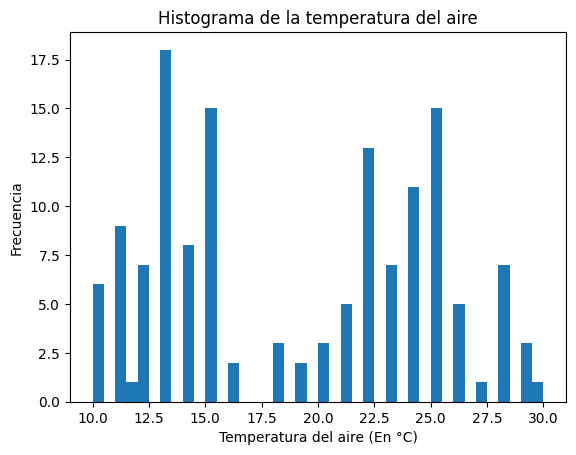

In [195]:
#Creamos el histograma, indicando 40 bins
plt.hist(dataset['tem_aire'], 40)

#Nombramos los ejes
plt.xlabel('Temperatura del aire (En °C)')
plt.ylabel('Frecuencia')

#Le agregamos un titlulo
plt.title('Histograma de la temperatura del aire')

plt.show()

### Oxigeno requerido para oxidar materia

Realizamos un grafico de barra de esta variable, agrupando los registros en intervalos de 30

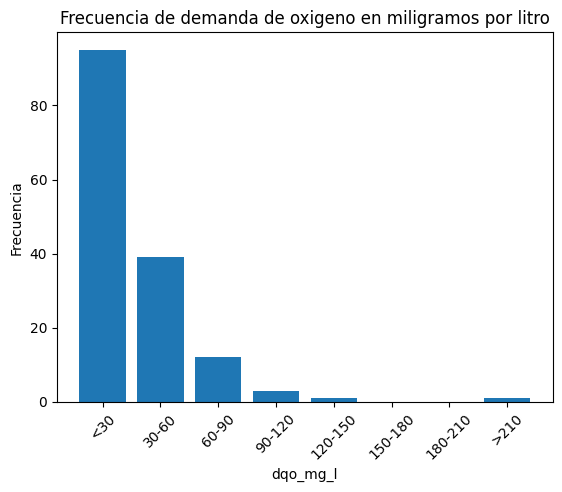

In [196]:
import matplotlib.pyplot as plt

#Realizamos una copia del dataset
datasetAgrupado = dataset.copy()

#Eliminamos los valores nulos para poder agrupar los datos usando '.dropna' 
# y 'subset=['dqo_mg_l']' para solo borrar los nulos de esa columna
datasetAgrupado = datasetAgrupado.dropna(subset=['dqo_mg_l'])

#Agregamos una columna "oxigeno_group" en donde se encontraran los valores de la columna dqo_mg_l agrupados
#El rango que utilizamos va desde 0, hasta el valor maximo de la columna + 30 para asegurarnos de que el ultimo 
#valor entre, e indicamos que vaya de 30 en 30
datasetAgrupado['oxigeno_group'] = pd.cut(datasetAgrupado['dqo_mg_l'], bins = range(0,max(datasetAgrupado['dqo_mg_l']+30),30))

# Contamos la frecuencia de cada grupo, indicando 'sort=false' para que no nos ordene los grupos y cambie el grafico
frecuencia = datasetAgrupado['oxigeno_group'].value_counts(sort=False)
#Imprimimos los grupos para saber cuantos intervalos hay y poder nombrar el eje x de nuestro grafico
frecuencia

#Nombramos cada intervalo para el eje x 
intervalos = ['<30','30-60','60-90','90-120','120-150','150-180','180-210','>210']

#Realizamos el grafico de barras
plt.bar(intervalos,frecuencia)
plt.xlabel('dqo_mg_l')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de demanda de oxigeno en miligramos por litro')
plt.xticks(rotation=45)

plt.show()

### Colonias de coliformes fecales

Analizamos el sitio de la muestra donde tenemos el outlier

In [197]:
#Encontramos el valor del outlier viendo en el Pandas Profilling Report
outlier = 150000
#Encontramos donde fue tomada esa muestra
sitio_outlier = dataset[dataset['colif_fecales_ufc_100ml'] == outlier]['sitios']

sitio_outlier

54    Perú Puente
Name: sitios, dtype: object

### Escherichia coli

Analizamos el sitio de la muestra donde tenemos el outlier

In [198]:
#Encontramos el valor del outlier viendo en el Pandas Profilling Report
outlier = 170000
#Encontramos donde fue tomada esa muestra
sitio_outlier = dataset[dataset['escher_coli_ufc_100ml'] == outlier]['sitios']

sitio_outlier

117    Calle 14 y Costa - Salida cloaca
Name: sitios, dtype: object

### Nitrato

Analizamos el sitio de la muestra donde tenemos el outlier

In [199]:
#Encontramos el valor del outlier viendo en el Pandas Profilling Report
outlier = 39.4
#Encontramos donde fue tomada esa muestra
sitio_outlier = dataset[dataset['nitrato_mg_l'] == outlier]['sitios']

sitio_outlier

50    Playa Espigón de Pacheco
Name: sitios, dtype: object

### Turbiedad

In [200]:
#Encontramos el valor del outlier viendo en el Pandas Profilling Report
outlier = 432
#Encontramos donde fue tomada esa muestra
sitio_outlier = dataset[dataset['turbiedad_ntu'] == outlier]['sitios']

sitio_outlier

137    Toma de agua Club de Pesca
Name: sitios, dtype: object

## Análisis bivariado

### HeatMap
Para poder guiarnos mejor en la correlacion de las variables, vamos a realizar el heatmap mostrando solo las correlaciones mayores a 0.7 y menores a 0.07

In [201]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   sitios                   169 non-null    object        
 1   codigo                   169 non-null    object        
 2   fecha                    169 non-null    datetime64[ns]
 3   campaña                  169 non-null    object        
 4   tem_agua                 138 non-null    float64       
 5   tem_aire                 142 non-null    float64       
 6   od                       133 non-null    float64       
 7   ph                       125 non-null    float64       
 8   olores                   151 non-null    boolean       
 9   color                    151 non-null    boolean       
 10  espumas                  151 non-null    boolean       
 11  mat_susp                 151 non-null    boolean       
 12  colif_fecales_ufc_100ml  144 non-nul

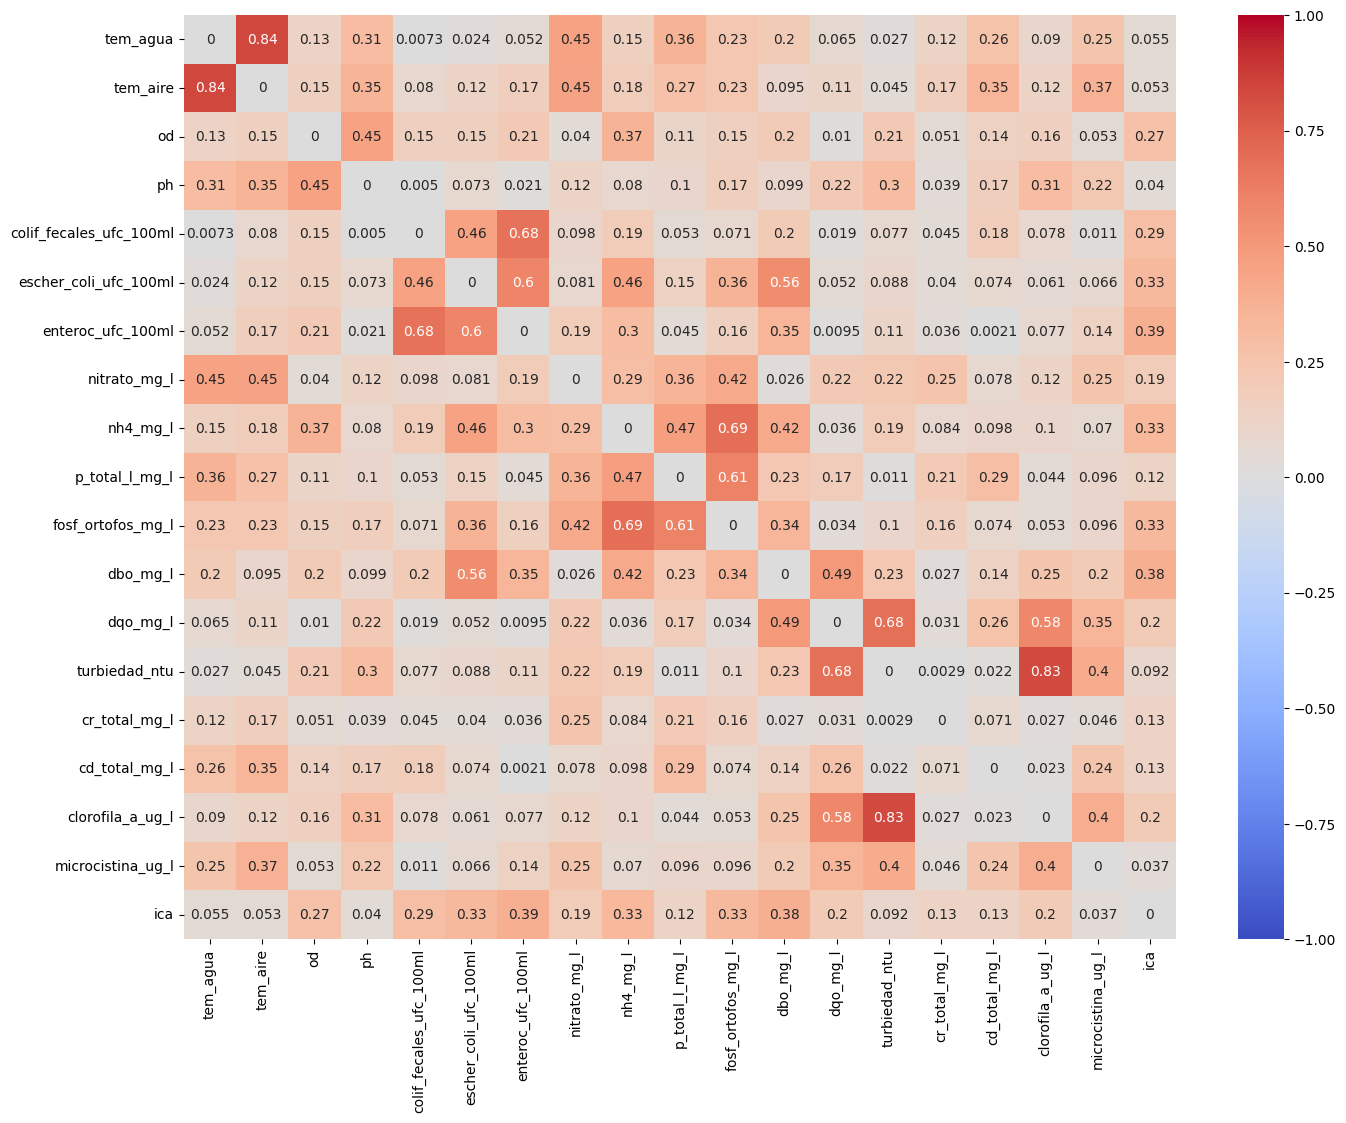

In [202]:
import seaborn as sns
import numpy as np

#nuevo dataset de variables numericas
numeric_dataset = dataset.copy()
numeric_dataset = numeric_dataset.drop('sitios', axis=1)
numeric_dataset = numeric_dataset.drop('codigo', axis=1)
numeric_dataset = numeric_dataset.drop('fecha', axis=1)
numeric_dataset = numeric_dataset.drop('campaña', axis=1)
numeric_dataset = numeric_dataset.drop('calidad_de_agua', axis=1)
numeric_dataset = numeric_dataset.drop('hidr_deriv_petr_ug_l', axis=1)
numeric_dataset = numeric_dataset.drop('espumas', axis=1)
numeric_dataset = numeric_dataset.drop('olores', axis=1)
numeric_dataset = numeric_dataset.drop('color', axis=1)
numeric_dataset = numeric_dataset.drop('mat_susp', axis=1)

#calculamos las correlaciones entre las varables
correlation_matrix = numeric_dataset.corr()
#creamos el heatmap
plt.figure(figsize=(16,12))

#mostramos solo los menores a 0.7
matrizMenores = correlation_matrix.abs() 
np.fill_diagonal(matrizMenores.values, 0)
sns.heatmap(matrizMenores, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap='coolwarm')

#Habilitamos la visualizacion de graficos en la notebook
#%matplotlib inline

plt.show()

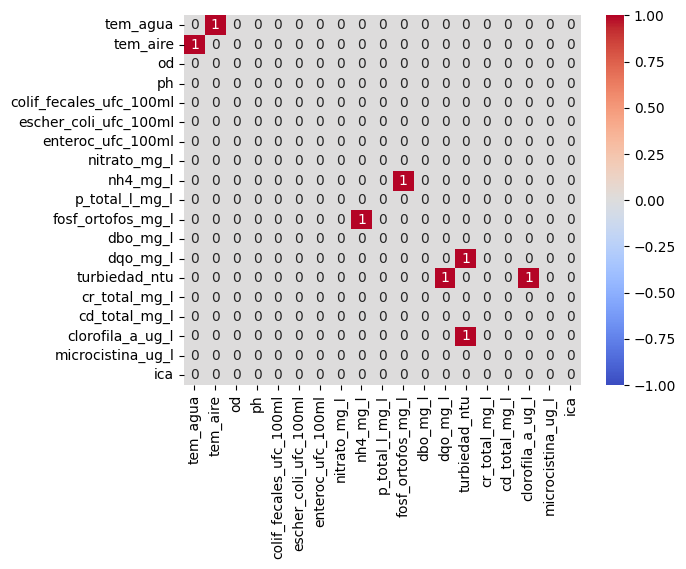

In [203]:
#Consideramos relvantes las correlaciones mayores a 0.68
matrizMayores = correlation_matrix.abs() > 0.68 
np.fill_diagonal(matrizMayores.values, 0)
sns.heatmap(matrizMayores, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap='coolwarm')

#Habilitamos la visualizacion de graficos en la notebook
%matplotlib inline

plt.show()

#### Analizaremos la correlacion entre turbiedad y demanda quimica de oxigeno

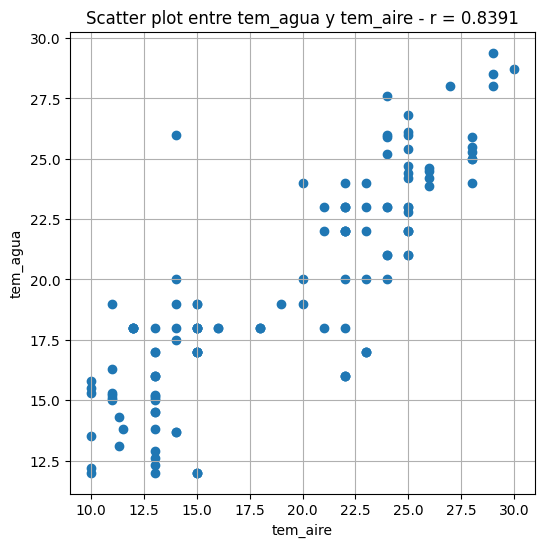

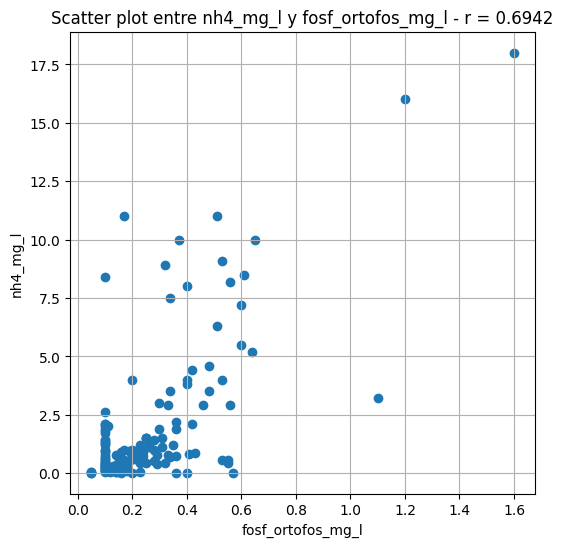

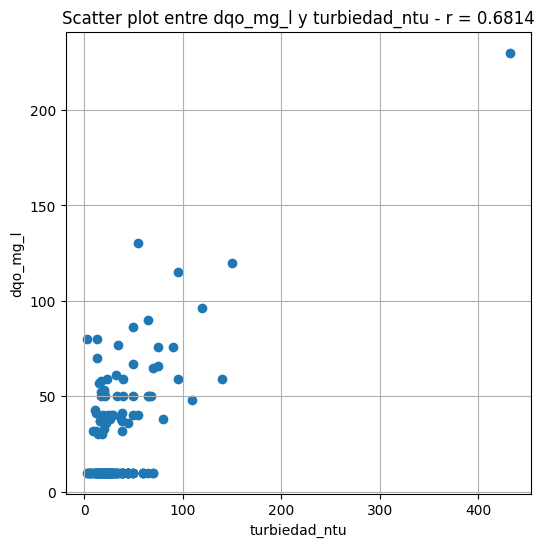

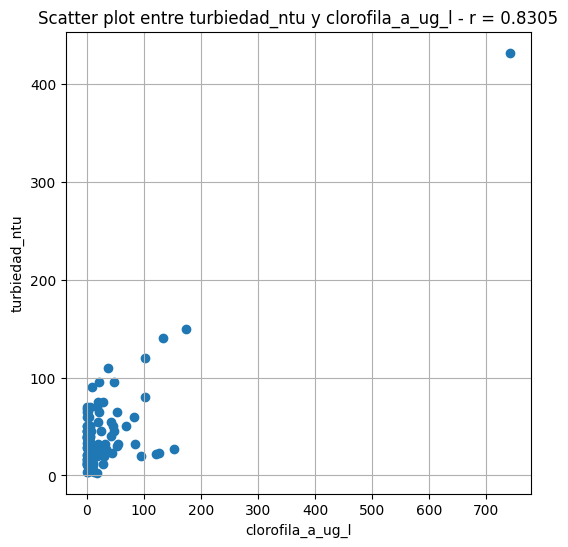

In [204]:
# iteramos por cada una de las columnas
for i, col in enumerate(matrizMayores.columns):
  # y por cada una de las filas (para eso usamos el índice)
  for j in range(i,len(matrizMayores.index)):
    # extraemos el nombre de la fila en la que estamos
    row = matrizMayores.index[j]
    # si en esa posición tenemos un True en la matriz umbralizada
    if matrizMayores.loc[row, col]:
      # nos traemos el valor de esa correlación
      correlation = correlation_matrix.loc[row, col]
      # representamos en un scatter plot cuadrado los valores de ambas variables
      plt.figure(figsize=(6, 6))
      plt.scatter(dataset[row], dataset[col])
      # y lo mostramos bonito
      plt.title(f"Scatter plot entre {col} y {row} - r = {correlation:.4f}")
      plt.xlabel(row)
      plt.ylabel(col)
      plt.grid(True)
      plt.show()

### Hipótesis 1: Los sitios con mayor concentración de nitrato tienen zonas de cultivos cercanas

Analizaremos si las zonas del rio mas afectadas por nitrato tienen cultivos cerca. Para esto veremos los registros donde el nitrato tiene concentraciones altas

In [205]:
nitratoMayores = dataset.loc[dataset['nitrato_mg_l']>20]
#nitratoMayores.info()
nitratoMayores[['sitios', 'nitrato_mg_l']]


,sitios,nitrato_mg_l
22,Rio Tigre 100m antes del Rio Luján,23.1
26,Río Lujan y Canal San Fernando,20.2
50,Playa Espigón de Pacheco,39.4
144,Arroyo El Gato,20.7
154,Diagonal 66 (descarga cloaca),22.5
158,Playa La Bagliardi,21.5


Podemos buscar cual es el lugar con menos cantidad de nitrato y compararlos

In [206]:
nitratoMenores = dataset.loc[dataset['nitrato_mg_l']<= 1]
nitratoMenores[['sitios', 'nitrato_mg_l']]

,sitios,nitrato_mg_l
7,Río Lujan y Arroyo Caraguatá,1.0
15,Río Carapachay y Arroyo Gallo Fiambre,1.0
31,Río Capitán y Río San Antonio,1.0
33,Arroyo Abra Vieja y Santa Rosa,1.0
35,Arroyo Abra Vieja y Santa Rosa,1.0
121,Puerto Trinidad calle 47,1.0
124,Costanera Hudson Calle 63,1.0
128,Boca Cerrada (Res.Nat. Punta Lara),1.0
150,Balneario Palo Blanco,1.0
153,Diagonal 66 (descarga cloaca),1.0


### Hipotesis 2: La estacion del año afecta a la contaminacion por enterococos

In [207]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   sitios                   169 non-null    object        
 1   codigo                   169 non-null    object        
 2   fecha                    169 non-null    datetime64[ns]
 3   campaña                  169 non-null    object        
 4   tem_agua                 138 non-null    float64       
 5   tem_aire                 142 non-null    float64       
 6   od                       133 non-null    float64       
 7   ph                       125 non-null    float64       
 8   olores                   151 non-null    boolean       
 9   color                    151 non-null    boolean       
 10  espumas                  151 non-null    boolean       
 11  mat_susp                 151 non-null    boolean       
 12  colif_fecales_ufc_100ml  144 non-nul

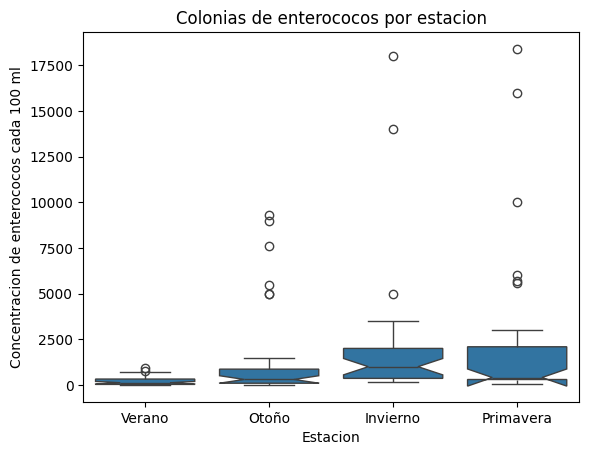

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='campaña', y='enteroc_ufc_100ml', data=dataset, notch=True)
plt.title("Colonias de enterococos por estacion")
plt.xlabel("Estacion")
plt.xticks(ticks=['Verano', 'otoño', 'invierno', 'primavera'], labels=["Verano", "Otoño", "Invierno", "Primavera"])
plt.ylabel("Concentracion de enterococos cada 100 ml")
plt.show()

Para poder visualizar mejor el grafico, haremos la escala de 0 a 4000 e ignoraremos los outliears.

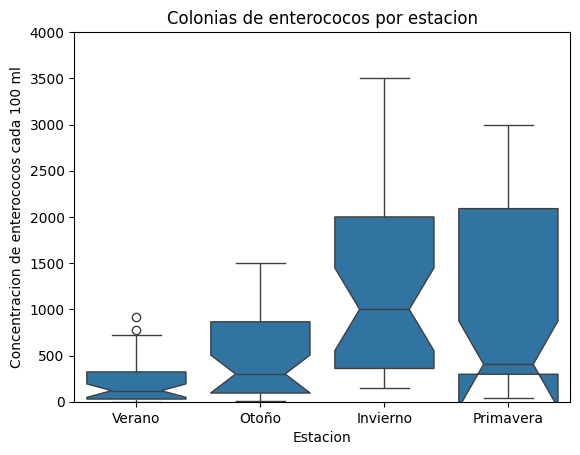

In [209]:
sns.boxplot(x='campaña', y='enteroc_ufc_100ml', data=dataset, notch=True)
plt.title("Colonias de enterococos por estacion")
plt.xlabel("Estacion")
plt.xticks(ticks=['Verano', 'otoño', 'invierno', 'primavera'], labels=["Verano", "Otoño", "Invierno", "Primavera"])
plt.ylim([0, 4000])
plt.ylabel("Concentracion de enterococos cada 100 ml")
plt.show()

Podemos observar que las medianas y sus intervalos de confianza de cada estacion no se solapan y son muy diferentes ente ellas. por lo tanto debemos verificar si su diferencia es significativa para poder comprobar nuestra hipotesis.

Debemos comprobar si la distribucion de los grupos es normal y si son homocedasticos para decidir si utilizamos un test parametrico o no parametrico.

In [210]:
from scipy.stats import shapiro

# Separamos los datos en cuatro grupos, invierno, verano, otoño y primavera.
invierno = dataset[dataset['campaña'] == 'invierno']['enteroc_ufc_100ml']
verano = dataset[dataset['campaña'] == 'Verano']['enteroc_ufc_100ml']
primavera = dataset[dataset['campaña'] == 'primavera']['enteroc_ufc_100ml']
otoño = dataset[dataset['campaña'] == 'otoño']['enteroc_ufc_100ml']

#borramos los NaN de las nuevas series
invierno = invierno.dropna()
verano = verano.dropna()
primavera = primavera.dropna()
otoño = otoño.dropna()

# Test de Shapiro-Wilk para invierno
stat, p = shapiro(invierno)
print(f"Test de Shapiro-Wilk para invierno: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para verano
stat, p = shapiro(verano)
print(f"Test de Shapiro-Wilk para verano: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para primavera
stat, p = shapiro(primavera)
print(f"Test de Shapiro-Wilk para primavera: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para otoño
stat, p = shapiro(otoño)
print(f"Test de Shapiro-Wilk para otoño: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para invierno: Estadístico=0.506, p-valor=0.000
Test de Shapiro-Wilk para verano: Estadístico=0.847, p-valor=0.000
Test de Shapiro-Wilk para primavera: Estadístico=0.572, p-valor=0.000
Test de Shapiro-Wilk para otoño: Estadístico=0.592, p-valor=0.000


Como el p-valor es menor al nivel de confianza (0.05) los datos no tienen una distribucion normal, por lo tanto no podemos usar test parametrico. 
Como tenemos que usar un test no parametrico y tenemos cuatro grupos, usaremos kruskal-wallis.

In [211]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Test de Kruskal-Wallis para comparar enterococos entre estaciones del año
stat, p = stats.kruskal(verano, invierno, primavera, otoño)
print(f"Test de Kruskal-Wallis para enterococos por estacion: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa entre los grupos")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa entre los grupos")

Test de Kruskal-Wallis para enterococos por estacion: Estadístico=36.711, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa entre los grupos


Vemos que el p-valor es menor que la confianza, por ende existe una diferencia significativa entre los grupos. Esto confirma nuestra hipotesis que de la concentracion de enterococos se ve afectada por la temperatura.
Como en el boxplot vemos que invierno y primavera tienen valores mas altos de enterococos, los analizamos para separado para definir en que estacion hay mas concentracion.

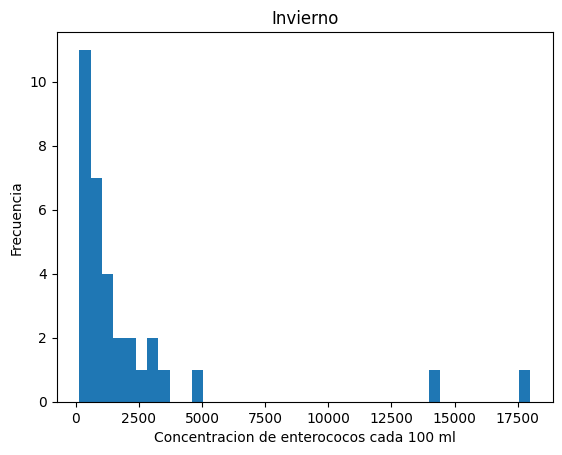

In [212]:
#Creamos el histograma, indicando 40 bins
plt.hist(invierno, 40)

#plt.xlim([0, 5500])

#Nombramos los ejes
plt.xlabel('Concentracion de enterococos cada 100 ml')
plt.ylabel('Frecuencia')

#Le agregamos un titlulo
plt.title('Invierno')

plt.show()

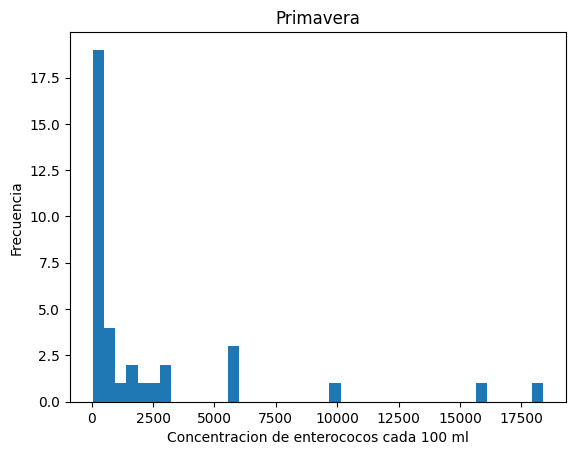

In [213]:
#Creamos el histograma, indicando 40 bins
plt.hist(primavera, 40)

#plt.xlim([0, 5500])

#Nombramos los ejes
plt.xlabel('Concentracion de enterococos cada 100 ml')
plt.ylabel('Frecuencia')

#Le agregamos un titlulo
plt.title('Primavera')

plt.show()

Nos podemos fijar en que zonas fueron realizadas las muestras con los valores mas altos (outliers) en invierno y primavera.

In [214]:
muestra = dataset.loc[dataset['enteroc_ufc_100ml']>9500]

muestra = muestra[['sitios','campaña', 'enteroc_ufc_100ml']]
muestra

,sitios,campaña,enteroc_ufc_100ml
54,Perú Puente,invierno,18000.0
55,Perú Puente,primavera,10000.0
63,Puerto de Olivos Espigón,primavera,16000.0
84,Cuatro bocas- desembocadura del Riachuelo,invierno,14000.0
159,Playa La Bagliardi,primavera,18400.0


### Hipotesis 6: La estacion del año afecta la calidad del agua

In [215]:
# Crear la tabla de contingencia
tabla_contingencia = pd.crosstab(dataset['campaña'],dataset['calidad_de_agua'])
print("Tabla de Contingencia:")
print(tabla_contingencia)

Tabla de Contingencia:
calidad_de_agua  Extremadamente deteriorada  Muy deteriorada
campaña                                                     
Verano                                   20                6
invierno                                 30                3
otoño                                    41                0
primavera                                36                1


Para ver mejor graficamente esta distribución, podemos realizar un grafico de barras

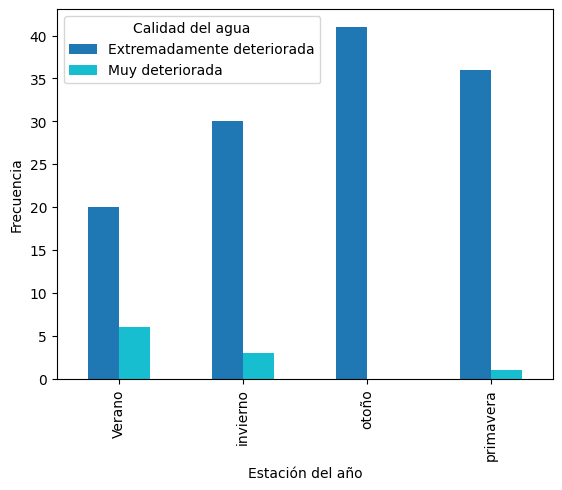

In [216]:
tabla_contingencia.plot(kind = 'bar', colormap = 'tab10')
plt.xlabel("Estación del año")
plt.ylabel("Frecuencia")

plt.legend(title = 'Calidad del agua')

Realizamos un test de Chi-cuadrado para ver la independencia de estas dos variables categóricas.

In [217]:
from scipy.stats import chi2_contingency

# Realizar el test de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("\nResultados del test de Chi-Cuadrado:")
print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(expected)

#Utilizamos una confianza de 95%
nivel_significancia = 0.05
if p < nivel_significancia:
    print('Hay suficiente evidencia para rechazar la hipotesis nula')
    print('Existe una relación significativa entre la estacion del año y la calidad del agua')
else:
    print('Hay suficiente evidencia para aceptar la hipotesis nula')
    print('No una relación significativa entre la estacion del año y la calidad del agua')


Resultados del test de Chi-Cuadrado:
Estadístico de chi-cuadrado: 14.10546031963355
Valor p: 0.0027650615862195023
Grados de libertad: 3
Frecuencias esperadas:
[[24.10218978  1.89781022]
 [30.59124088  2.40875912]
 [38.00729927  2.99270073]
 [34.29927007  2.70072993]]
Hay suficiente evidencia para rechazar la hipotesis nula
Existe una relación significativa entre la estacion del año y la calidad del agua


## Analisis multivariado

### Hipótesis 4: La contaminación por materia fecal provoca olor

#### Analisis con graficos

Realizaremos un grafico de dispersion con las variables colif_fecales_ufc_100ml y escher_coli_ufc_100ml, pintando de rojo los registros en donde hay presencia de olor y de gris en los que no.

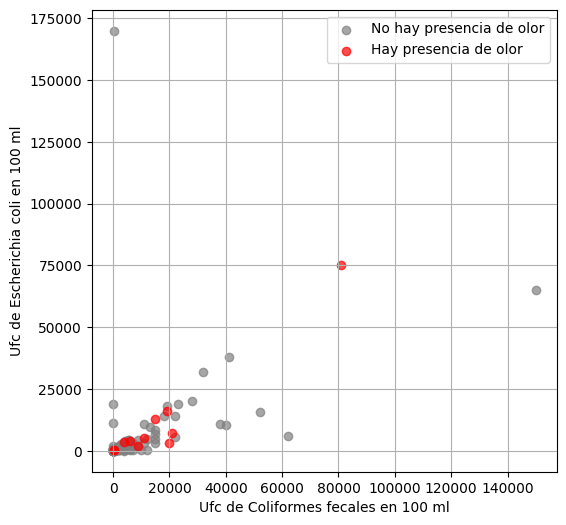

In [218]:
#Creamos un nuevo dataset con estas tres variables y sin los NaN
dataset_hip3 = dataset[['colif_fecales_ufc_100ml', 'escher_coli_ufc_100ml', 'olores']].dropna()
#Separamos el dataset segun la columna 'olores'
sin_olor = dataset_hip3[dataset_hip3['olores']==False]
con_olor = dataset_hip3[dataset_hip3['olores']==True]

plt.figure(figsize=(6,6))

#Graficamos los datos del nuevo dataset, indicando para el eje x la cantidad de colonias de coliformes y para el eje y la escherichia coli
#Utilizamos el color para pintar los registros segun la presencia de olor
plt.scatter(sin_olor['colif_fecales_ufc_100ml'], sin_olor['escher_coli_ufc_100ml'], color="gray", alpha=0.70, label="No hay presencia de olor")
plt.scatter(con_olor['colif_fecales_ufc_100ml'], con_olor['escher_coli_ufc_100ml'], color="red", alpha=0.70, label="Hay presencia de olor")

#Agregamos una grilla, los nombres de los ejes y el titulo
plt.grid(True)
plt.xlabel('Ufc de Coliformes fecales en 100 ml')
plt.ylabel('Ufc de Escherichia coli en 100 ml')
#Agregamos leyenda
plt.legend()
#Mostramos el grafico
plt.show()

Para poder apreciar mejor los datos cambiamos el rango, ignorando los outliers

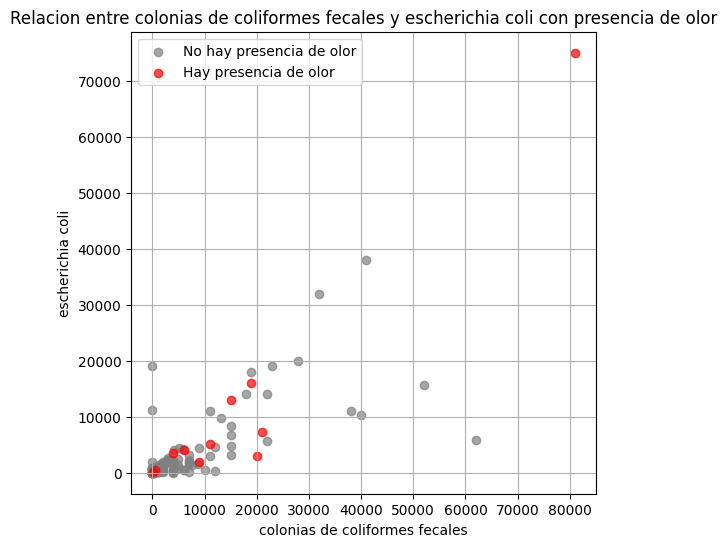

In [219]:
#Eliminamos los dos outliers
sin_olor = sin_olor[sin_olor['escher_coli_ufc_100ml']<170000]
sin_olor = sin_olor[sin_olor['colif_fecales_ufc_100ml']<120000]
plt.figure(figsize=(6,6))

#Graficamos los datos del nuevo dataset, indicando para el eje x la cantidad de colonias de coliformes y para el eje y la escherichia coli
#Utilizamos el color para pintar los registros segun la presencia de olor
plt.scatter(sin_olor['colif_fecales_ufc_100ml'], sin_olor['escher_coli_ufc_100ml'], color="gray", alpha=0.70, label="No hay presencia de olor")
plt.scatter(con_olor['colif_fecales_ufc_100ml'], con_olor['escher_coli_ufc_100ml'], color="red", alpha=0.70, label="Hay presencia de olor")

#Agregamos una grilla, los nombres de los ejes y el titulo
plt.grid(True)
plt.xlabel('colonias de coliformes fecales')
plt.ylabel('escherichia coli')
plt.title('Relacion entre colonias de coliformes fecales y escherichia coli con presencia de olor')
#Agregamos leyenda
plt.legend()
#Mostramos el grafico
plt.show()

#### Chequeo de normalidad y homocedasticidad

Realizaremos un test para ver la diferencia entre las muestras con olor y sin olor. Como no podemos trabajar con dos variables cuantitativas, realizamos el test para cada variable por separado. 

In [220]:
#Separamos los datasets por variable
escher_sin_olor = sin_olor['escher_coli_ufc_100ml']
coli_sin_olor = sin_olor['colif_fecales_ufc_100ml']

escher_con_olor = con_olor['escher_coli_ufc_100ml']
coli_con_olor = con_olor['colif_fecales_ufc_100ml']

Comprobamos la normalidad y homocedasticidad de los datos para decidir que test es correcto usar.

In [221]:
# Test de Shapiro-Wilk para los 4 datasets
stat, p = shapiro(escher_con_olor)
print(f"Test de Shapiro-Wilk para Escher con olor: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(escher_sin_olor)
print(f"Test de Shapiro-Wilk para Escher sin olor: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(coli_con_olor)
print(f"Test de Shapiro-Wilk para Coli con olor: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(coli_sin_olor)
print(f"Test de Shapiro-Wilk para Coli sin olor: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para Escher con olor: Estadístico=0.544, p-valor=0.000
Test de Shapiro-Wilk para Escher sin olor: Estadístico=0.520, p-valor=0.000
Test de Shapiro-Wilk para Coli con olor: Estadístico=0.662, p-valor=0.000
Test de Shapiro-Wilk para Coli sin olor: Estadístico=0.571, p-valor=0.000


El p-valor de nuestros datasets nos dio debajo del nivel de confianza (0.05). Esto indica que la hipotesis nula es rechazada, es decir que los datos no son normales.

In [222]:
#Verificamos homocedasticidad de los datos
stat, p = stats.levene(escher_con_olor, escher_sin_olor)
print(f"Test de Levene para Escherichia: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = stats.levene(coli_con_olor, coli_sin_olor)
print(f"Test de Levene para Coliformes: Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Levene para Escherichia: Estadístico=8.596, p-valor=0.004
Test de Levene para Coliformes: Estadístico=4.480, p-valor=0.036


El P-valor de nuestros datos nos resulto menor al nivel de confianza, por lo que no son homcedasticos. 
En base a esto, realizamos el test con Kruscal-Wallis.

#### Test para Escherichia coli

In [223]:
# Test de Kruskal-Wallis para comparar las medianas de los grupos con olor y sin olor
stat, p = stats.kruskal(escher_con_olor, escher_sin_olor)
print(f"Test de Kruskal-Wallis para Escherichia: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa entre los grupos de Escherichia.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa entre los grupos de Escherichia.")

Test de Kruskal-Wallis para Escherichia: Estadístico=8.393, p-valor=0.004
Se rechaza la hipótesis nula.
Existe una diferencia significativa entre los grupos de Escherichia.


#### Test para Coliformes fecales

In [224]:
# Test de Kruskal-Wallis para comparar las medianas de los grupos con olor y sin olor
stat, p = stats.kruskal(escher_con_olor, escher_sin_olor)
print(f"Test de Kruskal-Wallis para Escherichia: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa entre los grupos de Coliformes fecales.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa entre los grupos de Coliformes fecales.")

Test de Kruskal-Wallis para Escherichia: Estadístico=8.393, p-valor=0.004
Se rechaza la hipótesis nula.
Existe una diferencia significativa entre los grupos de Coliformes fecales.


#### Box plot de los grupos

C:\Users\bianc\AppData\Local\Temp\ipykernel_10264\1208742576.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='olores', y='escher_coli_ufc_100ml', data=escherichia, notch=True, palette = {'True' : 'Red', 'False' : 'Gray'})


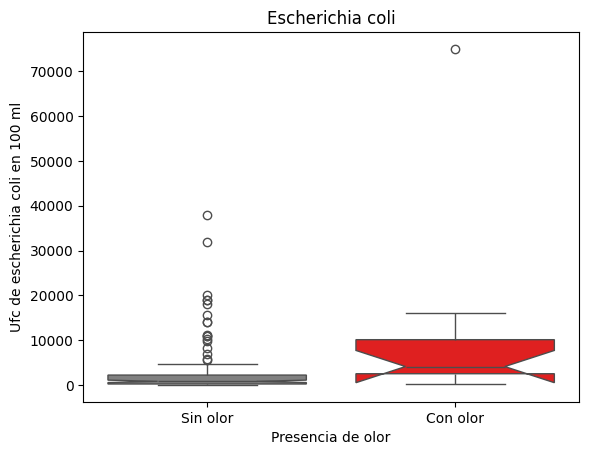

In [225]:
#Eliminamos outliers
dataset_hip3 = dataset_hip3[dataset_hip3['escher_coli_ufc_100ml']<170000]
dataset_hip3 = dataset_hip3[dataset_hip3['colif_fecales_ufc_100ml']<120000]

#Para realizar el box plot utilizamos un dataset con las columnas necesarias
escherichia = dataset_hip3[['escher_coli_ufc_100ml','olores']]

sns.boxplot(x='olores', y='escher_coli_ufc_100ml', data=escherichia, notch=True, palette = {'True' : 'Red', 'False' : 'Gray'})
plt.xlabel("Presencia de olor")
plt.xticks(ticks=[True, False], labels=["Con olor", "Sin olor"])
plt.ylabel("Ufc de escherichia coli en 100 ml")
plt.title('Escherichia coli')
plt.show()

C:\Users\bianc\AppData\Local\Temp\ipykernel_10264\1639167253.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='olores', y='colif_fecales_ufc_100ml', data=coliformes, notch=True, palette = {'True' : 'Red', 'False' : 'Gray'})


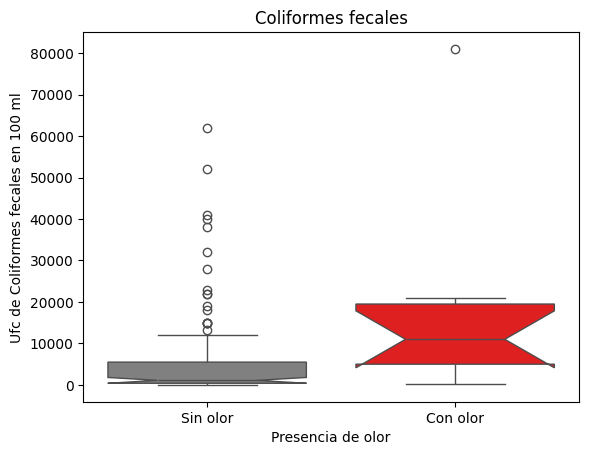

In [226]:
#Realizamos lo mismo para la columna de coliforme fecales
coliformes = dataset_hip3[['colif_fecales_ufc_100ml','olores']]

sns.boxplot(x='olores', y='colif_fecales_ufc_100ml', data=coliformes, notch=True, palette = {'True' : 'Red', 'False' : 'Gray'})
plt.xlabel("Presencia de olor")
plt.xticks(ticks=[True, False], labels=["Con olor", "Sin olor"])
plt.ylabel("Ufc de Coliformes fecales en 100 ml")
plt.title('Coliformes fecales')
plt.show()

### Hipotesis 3: A mayor clorofila y demanda quimica de oxigeno, mas turbia esta el agua.

#### Analisis grafico

A partir del heatmap realizado en el analisis bivariado, podemos observar que hay una correlacion lineal alta entre turbiedad_ntu y dqo_mg_l y entre turbiedad_ntu y clorofila_a_ug_l. A continuacion, lo analizaramos a mas detalle esta relacion a traves de un grafico de dispersion.

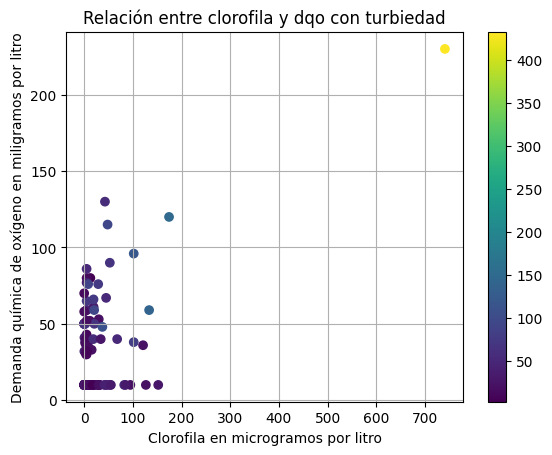

In [227]:
#Creamos un dataset con las variables a analizar y eliminamos los nulos
dataset_hip4 = dataset[['clorofila_a_ug_l', 'turbiedad_ntu', 'dqo_mg_l']].dropna()

#Graficamos los datos del nuevo dataset reducido, indicando para el eje x la columna clorofila y para el y la columna dqo. 
#Utilizamos el color para pintar los registros segun la turbiedad del agua.
plt.scatter(dataset_hip4['clorofila_a_ug_l'], dataset_hip4['dqo_mg_l'], c=dataset_hip4['turbiedad_ntu'], cmap='viridis')
#Agregamos una grilla, los nombres de los ejes, el titulo y una barra de color
plt.grid(True)
plt.xlabel('Clorofila en microgramos por litro')
plt.ylabel('Demanda química de oxígeno en miligramos por litro')
plt.title('Relación entre clorofila y dqo con turbiedad')
plt.colorbar()


plt.show()

#### Corrección 

Mostramos el registro del outlier

In [228]:
# Cambiamos la configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

outlier = dataset[dataset['clorofila_a_ug_l'] > 700]
outlier

,sitios,codigo,fecha,campaña,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
137,Toma de agua Club de Pesca,EN082,2023-02-22,Verano,24.2,25.0,7.13,8.69,False,False,False,False,700.0,60.0,40.0,2.5,0.025,0.81,0.2,11.0,230,432.0,<0.10,0.0025,0.0005,740.93,5.0,<NA>,NaN


In [229]:
#Eliminamos el outlier del dataset para mejorar el analisis
dataset_hip4 = dataset_hip4[dataset_hip4['clorofila_a_ug_l'] < 700]

#Creamos dos datasets separando por turbiedad aceptable y no aceptable
no_turbio = dataset_hip4[dataset_hip4['turbiedad_ntu'] <= 25]
turbio = dataset_hip4[dataset_hip4['turbiedad_ntu'] > 25]

#Separamos por las variables a analizar
clor_no_turbio = no_turbio[['clorofila_a_ug_l']]
clor_turbio = turbio[['clorofila_a_ug_l']]

dqo_no_turbio = no_turbio[['dqo_mg_l']]
dqo_turbio = turbio[['dqo_mg_l']]

#### Chequeo de normalidad y homocedasticidad

In [230]:
# Test de Shapiro-Wilk para los 4 datasets
stat, p = shapiro(clor_no_turbio)
print(f"Test de Shapiro-Wilk para Clorofila sin turbiedad: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(clor_turbio)
print(f"Test de Shapiro-Wilk para Clorofila con turbiedad: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(dqo_no_turbio)
print(f"Test de Shapiro-Wilk para Demanda de oxigeno sin turbiedad: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(dqo_turbio)
print(f"Test de Shapiro-Wilk para Demanda de oxigeno con turbiedad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para Clorofila sin turbiedad: Estadístico=0.455, p-valor=0.000
Test de Shapiro-Wilk para Clorofila con turbiedad: Estadístico=0.676, p-valor=0.000
Test de Shapiro-Wilk para Demanda de oxigeno sin turbiedad: Estadístico=0.643, p-valor=0.000
Test de Shapiro-Wilk para Demanda de oxigeno con turbiedad: Estadístico=0.777, p-valor=0.000


El p-valor de nuestros datasets nos dio debajo del nivel de confianza (0.05). Esto indica que la hipotesis nula es rechazada, es decir que los datos no son normales.

In [231]:
#Verificamos homocedasticidad de los datos con Levene
stat, p = stats.levene(clor_no_turbio, clor_turbio)
print(f"Test de Levene para Clorofila: Estadístico={stat}, p-valor={p}")

stat, p = stats.levene(dqo_no_turbio, dqo_turbio)
print(f"Test de Levene para Demanda de oxigeno: Estadístico={stat}, p-valor={p}")

Test de Levene para Clorofila: Estadístico=[6.9859739], p-valor=[0.0091183]
Test de Levene para Demanda de oxigeno: Estadístico=[9.08801518], p-valor=[0.00303818]


El P-valor de nuestros datos nos resulto menor al nivel de confianza, por lo que no son homcedasticos. 
En base a esto, realizamos el test con Kruscal-Wallis.

#### Test para Clorofila

In [232]:
# Test de Kruskal-Wallis para comparar las medianas de los grupos con turbiedad en el agua y sin turbiedad
stat, p = stats.kruskal(clor_no_turbio, clor_turbio)
print(f"Test de Kruskal-Wallis para Clorofila: Estadístico={stat}, p-valor={p}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa entre los grupos de Clorofila.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa entre los grupos de Clorofila.")

Test de Kruskal-Wallis para Clorofila: Estadístico=[0.62898321], p-valor=[0.42772853]
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa entre los grupos de Clorofila.


#### Test para Demanda de oxigeno

In [233]:
# Test de Kruskal-Wallis para comparar las medianas de los grupos con turbiedad en el agua y sin turbiedad
stat, p = stats.kruskal(dqo_no_turbio, dqo_turbio)
print(f"Test de Kruskal-Wallis para Demanda de oxigeno: Estadístico={stat}, p-valor={p}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa entre los grupos de Demanda de oxigeno.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa entre los grupos de Demanda de oxigeno.")

Test de Kruskal-Wallis para Demanda de oxigeno: Estadístico=[6.63322388], p-valor=[0.01000939]
Se rechaza la hipótesis nula.
Existe una diferencia significativa entre los grupos de Demanda de oxigeno.


#### Box plot de los grupos

Ya que la turbiedad se ve mas relacionada con la Demanda de oxigeno y no con la clorofila, podemos ver como se distribuyen los datos utilizando box plot

C:\Users\bianc\AppData\Local\Temp\ipykernel_10264\2413775504.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='existe_turbiedad', y='clorofila_a_ug_l', data=clorofila, notch=True,palette = {'True' : 'green', 'False' : 'Gray'})


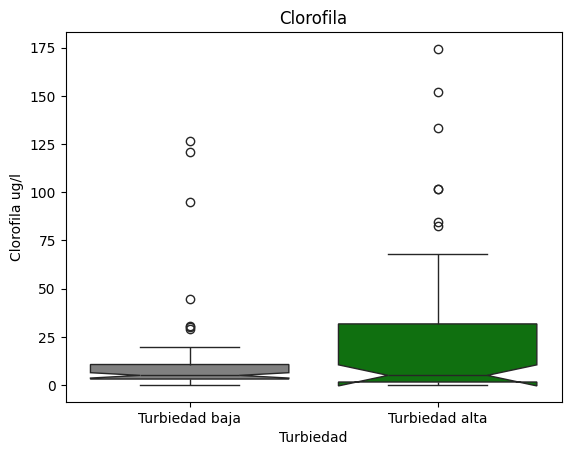

In [234]:
#Convertimos la columna de turbiedad en booleana para poder graficar. Indicando true para cuando la turbiedad es alta, y false para cuando es baja
dataset_hip4['existe_turbiedad'] = dataset_hip4['turbiedad_ntu'] >=25

#Para realizar el box plot utilizamos un dataset con las columnas necesarias
clorofila = dataset_hip4[['clorofila_a_ug_l','existe_turbiedad']]


sns.boxplot(x='existe_turbiedad', y='clorofila_a_ug_l', data=clorofila, notch=True,palette = {'True' : 'green', 'False' : 'Gray'})
plt.xlabel("Turbiedad")
plt.xticks(ticks=[True, False], labels=["Turbiedad alta", "Turbiedad baja"])
plt.ylabel("Clorofila ug/l")
plt.title('Clorofila')
plt.show()

C:\Users\bianc\AppData\Local\Temp\ipykernel_10264\3621426842.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='existe_turbiedad', y='dqo_mg_l', data=dqo, notch=True,palette = {'True' : 'green', 'False' : 'Gray'})


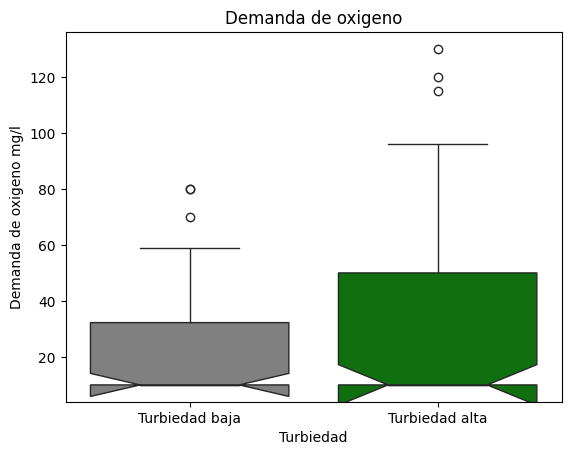

In [235]:
#Para realizar el box plot utilizamos un dataset con las columnas necesarias
dqo = dataset_hip4[['dqo_mg_l','existe_turbiedad']]

sns.boxplot(x='existe_turbiedad', y='dqo_mg_l', data=dqo, notch=True,palette = {'True' : 'green', 'False' : 'Gray'})
plt.xlabel("Turbiedad")
plt.xticks(ticks=[True, False], labels=["Turbiedad alta", "Turbiedad baja"])
plt.ylabel("Demanda de oxigeno mg/l")
plt.title('Demanda de oxigeno')
plt.show()

### Hipótesis 2: Si el valor de amonio es más alto que el de nitrato, la contaminación orgánica ha sido reciente

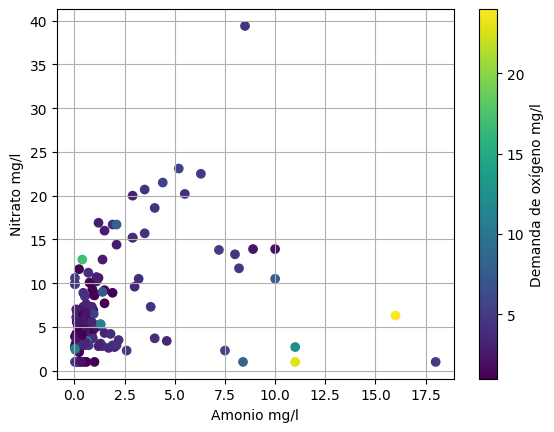

In [236]:
#Creamos un dataset con las variables a analizar y eliminamos los nulos
dataset_hip5 = dataset[['nh4_mg_l', 'nitrato_mg_l', 'dbo_mg_l']].dropna()

#Graficamos los datos del nuevo dataset reducido, indicando para el eje x la columna clorofila y para el y la columna dqo. 
#Utilizamos el color para pintar los registros segun la turbiedad del agua.
plt.scatter(dataset_hip5['nh4_mg_l'], dataset_hip5['nitrato_mg_l'], c=dataset_hip5['dbo_mg_l'], cmap='viridis')
#Agregamos una grilla, los nombres de los ejes, el titulo y una barra de color
plt.grid(True)
plt.xlabel('Amonio mg/l')
plt.ylabel('Nitrato mg/l')
plt.colorbar(label='Demanda de oxígeno mg/l')
plt.xlim()

plt.show()

### Hipotesis 7: Se puede predecir el indice de calidad del agua a partir de la contaminacion fecal, organica y la temperatura

Para ver que variables afectan mas a la columna 'ica' realizaremos una regresion lineal multiple

#### Histograma de ICA

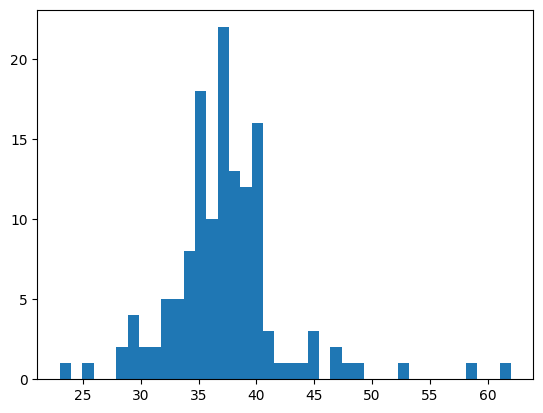

In [237]:
#Hacemos un histograma para detectar si hay outliers en ica
plt.hist(numeric_dataset['ica'], bins = 40)
plt.show()

Vemos que existen tres valores que consideramos outliers. Para realizar una mejor la regresion lineal, los eliminamos.
Ademas, analizamos el pandas profiling hecho anteriormente para hacer una limpieza de otros outliers que puedan alterar el modelo.

In [241]:
hip_7 = numeric_dataset

#Eliminacion de outliers de las otras variables
hip_7 = hip_7[hip_7['colif_fecales_ufc_100ml']<80000]
hip_7 = hip_7[hip_7['escher_coli_ufc_100ml']<100000]
hip_7 = hip_7[hip_7['nitrato_mg_l']<30]
hip_7 = hip_7[hip_7['dqo_mg_l']<200]
hip_7 = hip_7[hip_7['turbiedad_ntu']<400]
hip_7 = hip_7[hip_7['cr_total_mg_l']<5]
hip_7 = hip_7[hip_7['clorofila_a_ug_l']<400]
              

#### Estandarizamos las variables

In [242]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

#Separamos la variable objetivo de las predictoras
hip_7 = hip_7.dropna()
x = hip_7.drop('ica', axis = 1)
y = hip_7['ica']

#Estandarizamos las variables
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#Metemos x_scaled en un dataframe para no perder el nombre de las columnas
x_scaled_df = pd.DataFrame(x_scaled,columns = x.columns)

#Vemos si se escalo correctamente
print('Antes de escalar:')
print(pd.DataFrame(x).describe().loc[['mean','std']])
print('Despues de escalar:')
print(pd.DataFrame(x_scaled_df).describe().loc[['mean','std']])

Antes de escalar:
       tem_agua   tem_aire        od        ph  colif_fecales_ufc_100ml  \
mean  19.554198  18.285185  6.151481  7.337531               5217.41358   
std    4.922850   6.283353  2.356783  0.866554               9083.04000   

      escher_coli_ufc_100ml  enteroc_ufc_100ml  nitrato_mg_l  nh4_mg_l  \
mean            2775.104938        1082.317160      7.043210  1.486728   
std             5152.315966        2253.352728      5.308624  1.871956   

      p_total_l_mg_l  fosf_ortofos_mg_l  dbo_mg_l   dqo_mg_l  turbiedad_ntu  \
mean        0.478025           0.244815  2.609877  21.592593      30.603704   
std         0.519871           0.174350  1.494206  20.520586      19.331965   

      cr_total_mg_l  cd_total_mg_l  clorofila_a_ug_l  microcistina_ug_l  
mean       0.002853       0.136167         13.390370           0.172346  
std        0.001338       0.223555         21.159008           0.374973  
Despues de escalar:
          tem_agua      tem_aire            od       

#### Ajustamos el modelo

In [243]:
y.info()
x_scaled_df.info()

<class 'pandas.core.series.Series'>
Index: 81 entries, 0 to 168
Series name: ica
Non-Null Count  Dtype
--------------  -----
81 non-null     Int64
dtypes: Int64(1)
memory usage: 1.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tem_agua                 81 non-null     float64
 1   tem_aire                 81 non-null     float64
 2   od                       81 non-null     float64
 3   ph                       81 non-null     float64
 4   colif_fecales_ufc_100ml  81 non-null     float64
 5   escher_coli_ufc_100ml    81 non-null     float64
 6   enteroc_ufc_100ml        81 non-null     float64
 7   nitrato_mg_l             81 non-null     float64
 8   nh4_mg_l                 81 non-null     float64
 9   p_total_l_mg_l           81 non-null     float64
 10  fosf_ortofos_mg_l        81 non-null     float64
 11  dbo_m

Al ajustar, nos daba un error por los indices de los datasets, los cuales no coincidian. Por esto, los reseteamos

In [244]:
# Resetear el índice de ambos DataFrames
y = y.reset_index(drop=True)
x_scaled_df = x_scaled_df.reset_index(drop=True)

#Agregamos una constante como ordenada al origen
x_scaled_df = sm.add_constant(x_scaled_df)

#Ajustamos el modelo
model = sm.OLS(y, x_scaled_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ica   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     2.759
Date:                Wed, 13 Nov 2024   Prob (F-statistic):            0.00160
Time:                        15:08:36   Log-Likelihood:                -226.27
No. Observations:                  81   AIC:                             490.5
Df Residuals:                      62   BIC:                             536.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

A traves de esta informacion podemos ver lo siguiente:

R-squared = 0.445. Esto nos dice que el modelo nos explica un 44,5% de la varianza

Prob (F-statistic) >0.001. Esto nos muestra que el modelo no es significativo, es decir que estas variables no son muy utiles para predecir el ica.

Coeficientes del modelo lineal: Vemos que las variables que mas influyen son: od, enteroc_ufc_100ml, fosf_ortofos_mg_l, cd_total_mg_l y clorofila_a_ug_l.

#### Normalidad de los residuos

Como los test Omnibus y Jarque-Bera indican que los residuos no son normales, es decir, un p-valor <0.001, haremos un QQ-plot para analizar la normalidad a detalle

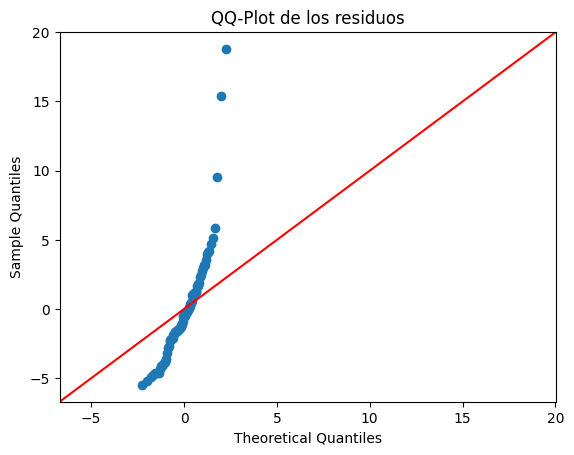

In [245]:
sm.qqplot(model.resid, line = '45')
plt.title('QQ-Plot de los residuos')
plt.show()

In [246]:
#Vemos que los residuos no se ven normales, utilizamos Shapiro-wilk confirmal que no tienen una distribucion normal
_,p = shapiro(model.resid)
print("P= %.4f" % (p))

alpha = 0.05
if p > alpha:
    print('Se distribuye normal')
else:
    print('No se distribuye normal')

P= 0.0000
No se distribuye normal


Confirmamos que los residuos no se distribuyen normal, por lo tanto las hipotesis de nuestro modelo no se cumplen y no podemos utilizarlo.

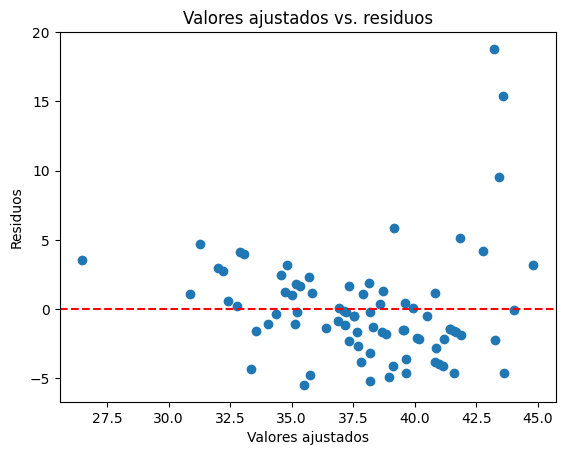

In [247]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Valores ajustados vs. residuos')
plt.axhline(0, color = 'red', linestyle = '--')
plt.show()

#### Realizamos una nueva regresion eliminando las variables que no contribuyen

In [251]:
hip_7_nueva = hip_7.drop('tem_agua', axis = 1)
hip_7_nueva = hip_7_nueva.drop('turbiedad_ntu', axis = 1)
hip_7_nueva = hip_7_nueva.drop('microcistina_ug_l', axis = 1)
hip_7_nueva = hip_7_nueva.drop('nitrato_mg_l', axis = 1)

x = hip_7_nueva.drop('ica', axis = 1)
y = hip_7_nueva['ica']

#Estandarizamos las variables
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#Metemos x_scaled en un dataframe para no perder el nombre de las columnas
x_scaled_df = pd.DataFrame(x_scaled,columns = x.columns)

#Vemos si se escalo correctamente
print('Antes de escalar:')
print(pd.DataFrame(x).describe().loc[['mean','std']])
print('Despues de escalar:')
print(pd.DataFrame(x_scaled_df).describe().loc[['mean','std']])

Antes de escalar:
       tem_aire        od        ph  colif_fecales_ufc_100ml  \
mean  18.285185  6.151481  7.337531               5217.41358   
std    6.283353  2.356783  0.866554               9083.04000   

      escher_coli_ufc_100ml  enteroc_ufc_100ml  nh4_mg_l  p_total_l_mg_l  \
mean            2775.104938        1082.317160  1.486728        0.478025   
std             5152.315966        2253.352728  1.871956        0.519871   

      fosf_ortofos_mg_l  dbo_mg_l   dqo_mg_l  cr_total_mg_l  cd_total_mg_l  \
mean           0.244815  2.609877  21.592593       0.002853       0.136167   
std            0.174350  1.494206  20.520586       0.001338       0.223555   

      clorofila_a_ug_l  
mean         13.390370  
std          21.159008  
Despues de escalar:
          tem_aire            od            ph  colif_fecales_ufc_100ml  \
mean  5.482583e-17  2.576814e-16 -6.318677e-16             6.167906e-18   
std   1.006231e+00  1.006231e+00  1.006231e+00             1.006231e+00   

    

In [252]:
# Resetear el índice de ambos DataFrames
y = y.reset_index(drop=True)
x_scaled_df = x_scaled_df.reset_index(drop=True)

#Agregamos una constante como ordenada al origen
x_scaled_df = sm.add_constant(x_scaled_df)

#Ajustamos el modelo
model = sm.OLS(y, x_scaled_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ica   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     3.754
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           0.000127
Time:                        15:28:39   Log-Likelihood:                -226.37
No. Observations:                  81   AIC:                             482.7
Df Residuals:                      66   BIC:                             518.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

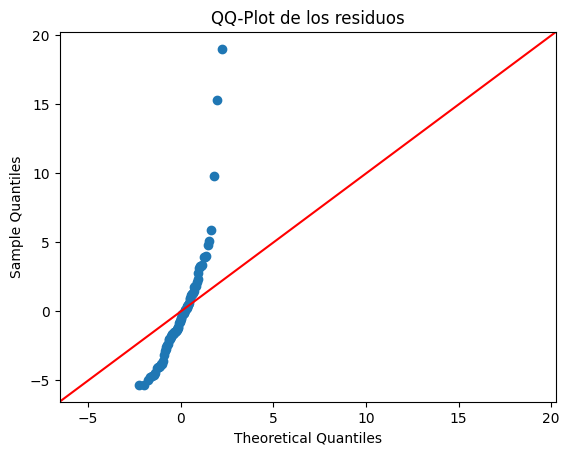

In [253]:
sm.qqplot(model.resid, line = '45')
plt.title('QQ-Plot de los residuos')
plt.show()

Se puede ve que no se es posible predecir el indice de calidad del agua con una regresion lineal

### Reduccion de dimensionalidad en base al ica

Como el dataset tiene muchas columnas, realizaremos una reduccion de dimensionalidad utilizando como variable objetivo la columna "ica" para poder ver que variables tienen mas impacto en la calidad del agua.
Comenzamos por crear un nuevo dataset en el que excluiremos las variables no cuantitativas y la variable objetivo (ica).

In [ ]:
#creamos el nuevo dataset, agregando todas las columnas numericas y nuestra variable objetivo para quedarnos solo con los registros que no tengan NaN en ninguna columna
dataset_reducido_ica = dataset[['tem_agua', 'tem_aire', 'od', 'ph', 'colif_fecales_ufc_100ml', 'escher_coli_ufc_100ml', 'enteroc_ufc_100ml', 'nitrato_mg_l', 'nh4_mg_l', 'p_total_l_mg_l', 'fosf_ortofos_mg_l', 'dbo_mg_l', 'dqo_mg_l', 'turbiedad_ntu', 'cr_total_mg_l', 'cd_total_mg_l', 'clorofila_a_ug_l', 'microcistina_ug_l', 'ica']]
#chequeamos que se haya creado correctamente.
dataset_reducido_ica.head()

,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica
0,26.0,24.0,6.59,7.24,600.0,100.0,130.0,3.9,0.025,0.26,0.05,1.0,10,29.0,0.0025,0.0005,0.87,0.075,53
1,18.0,12.0,7.09,7.22,3200.0,2200.0,770.0,3.9,0.300,0.16,0.15,1.0,10,45.0,0.0025,0.5000,2.56,0.075,39
2,16.3,11.0,8.53,7.27,240.0,200.0,300.0,4.2,0.190,0.57,0.10,1.0,10,38.0,0.0025,0.0005,1.02,0.075,48
3,23.0,25.0,4.72,6.57,200.0,180.0,290.0,3.3,0.130,0.12,0.10,1.0,10,24.0,0.0025,0.0005,5.00,0.075,42
4,26.8,25.0,5.94,6.96,1000.0,400.0,1.5,5.2,0.250,0.16,0.11,2.1,10,24.0,0.0025,0.0005,10.61,0.210,39


Usaremos PCA para llevar el dataset_reducido a un espacio de dos dimensiones.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#eliminamos las filas con valores NaN
dataset_reducido_ica=dataset_reducido_ica.dropna(axis=0)
#eliminamos nuestra variable objetivo
dataset_reducido= dataset_reducido_ica.drop('ica', axis=1)

#Estandarizamos los datos del dataset_reducido para que tengan la misma varianza
scaler = StandardScaler()
reducido_escalado = scaler.fit_transform(dataset_reducido)

#creamos una instancia de la clase PCA, indicando la cantidad de dimensiones deseadas
pca = PCA(n_components=2)
#Ajustamos el objeto pca usando los datos y transformamos los datos a la dimension requerida.
componentesPrincipales = pca.fit_transform(reducido_escalado)
#Chequeamos que se haya reducido correctamente la dimension impriendo la cantidad de filas y columnas de ambos datasets
print('Antes de PCA: {}'.format(dataset_reducido.shape))
print('Despues de PCA:{}'.format(componentesPrincipales.shape))

Antes de PCA: (84, 18)
Despues de PCA:(84, 2)


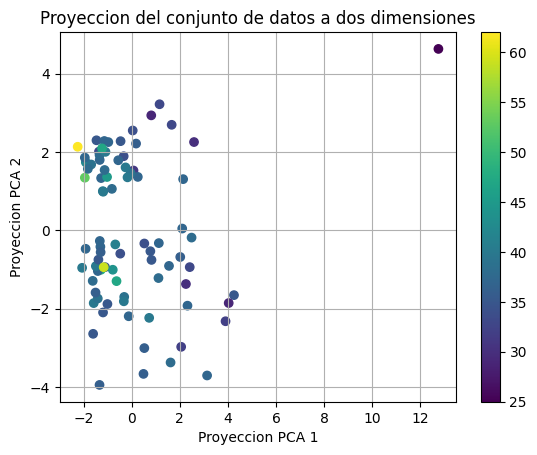

In [ ]:
#Graficamos los datos del nuevo dataset reducido, indicando para los ejes x e y los primeros dos componentes principales
#Utilizamos el color para pintar los registros segun el indice de calidad de agua asociado.
plt.scatter(componentesPrincipales[:,0], componentesPrincipales[:,1], c=dataset_reducido_ica['ica'], cmap='viridis')
#Agregamos una grilla, los nombres de los ejes, el titulo y una barra de color
plt.grid(True)
plt.xlabel('Proyeccion PCA 1')
plt.ylabel('Proyeccion PCA 2')
plt.title('Proyeccion del conjunto de datos a dos dimensiones')
plt.colorbar()
#Ajustamos el rango
plt.show()

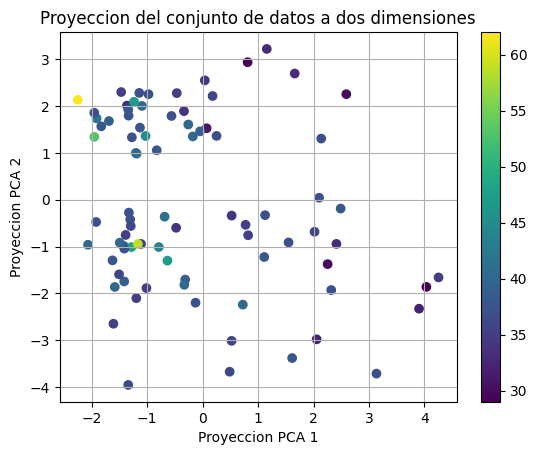

In [ ]:
#Eliminamos el outlier para mejorar el analisis

outlier = (componentesPrincipales[:,0]>10) & (componentesPrincipales[:,1]>4)
componentesPrincipales = componentesPrincipales[~outlier]
dataset_reducido_ica_sin_out = dataset_reducido_ica[~outlier]

#Volvemos a graficar 
plt.scatter(componentesPrincipales[:,0], componentesPrincipales[:,1], c=dataset_reducido_ica_sin_out['ica'], cmap='viridis')
#Agregamos una grilla, los nombres de los ejes, el titulo y una barra de color
plt.grid(True)
plt.xlabel('Proyeccion PCA 1')
plt.ylabel('Proyeccion PCA 2')
plt.title('Proyeccion del conjunto de datos a dos dimensiones')
plt.colorbar()
#Ajustamos el rango
plt.show()

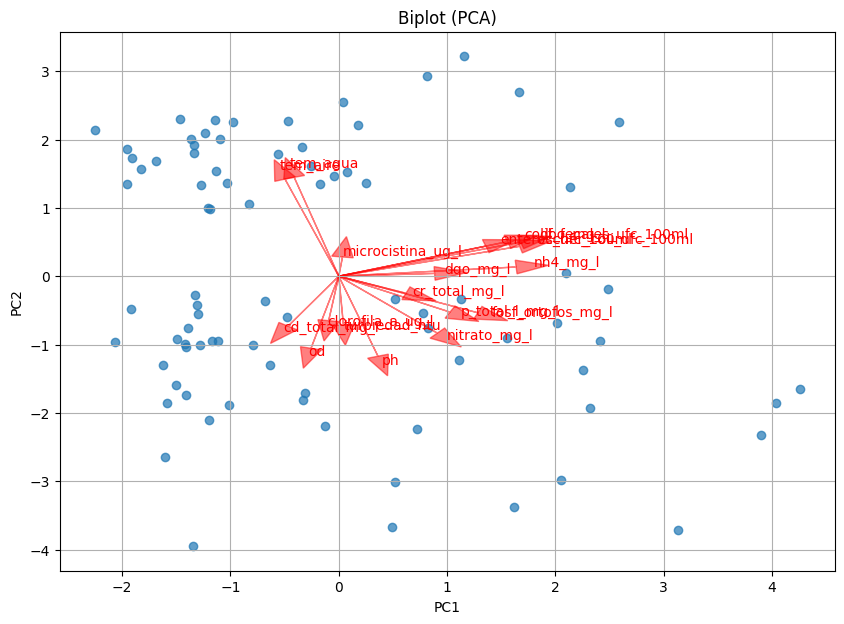

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Creamos un DataFrame con los componentes principales
pc_df = pd.DataFrame(componentesPrincipales, columns=['PC1', 'PC2'])

# Configuramos el tamaño del gráfico
plt.figure(figsize=(10, 7))

# Graficamos los puntos (observaciones) en el espacio de los componentes principales
plt.scatter(pc_df['PC1'], pc_df['PC2'], alpha=0.7)

# Dibujamos las flechas para cada variable original
for i, feature in enumerate(dataset_reducido.columns):
    plt.arrow(0, 0, pca.components_[0, i] * max(pc_df['PC1']),
              pca.components_[1, i] * max(pc_df['PC2']),
              color='r', alpha=0.5, head_width=0.2)
    plt.text(pca.components_[0, i] * max(pc_df['PC1']) * 1.1,
             pca.components_[1, i] * max(pc_df['PC2']) * 1.1,
             feature, color='r')

# Etiquetas y títulos
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot (PCA)')
plt.grid()

plt.show()


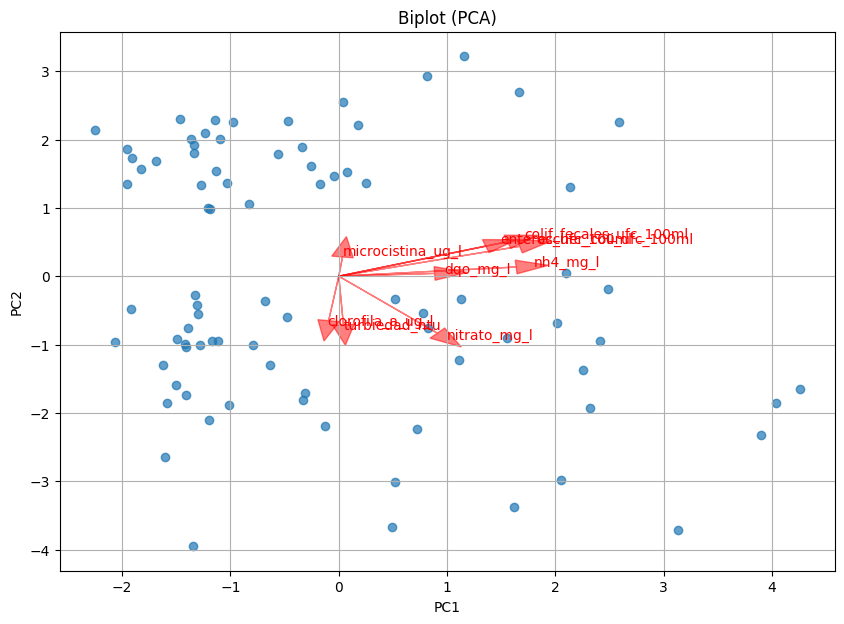

In [ ]:
# Creamos un DataFrame con los componentes principales
pc_df = pd.DataFrame(componentesPrincipales, columns=['PC1', 'PC2'])

# Configuramos el tamaño del gráfico
plt.figure(figsize=(10, 7))

# Graficamos los puntos (observaciones) en el espacio de los componentes principales
plt.scatter(pc_df['PC1'], pc_df['PC2'], alpha=0.7)

#Variables a excluir
variables_incluir = ['colif_fecales_ufc_100ml', 'nh4_mg_l', 'enteroc_ufc_100ml', 'escher_coli_ufc_100ml', 'dqo_mg_l', 'turbiedad_ntu', 'clorofila_a_ug_l', 'microcistina_ug_l', 'nitrato_mg_l']
# Dibujamos las flechas para cada variable original
for i, feature in enumerate(dataset_reducido.columns):
    if dataset_reducido.columns[i] in variables_incluir:
        plt.arrow(0, 0, pca.components_[0, i] * max(pc_df['PC1']),
                pca.components_[1, i] * max(pc_df['PC2']),
                color='r', alpha=0.5, head_width=0.2)
        plt.text(pca.components_[0, i] * max(pc_df['PC1']) * 1.1,
                pca.components_[1, i] * max(pc_df['PC2']) * 1.1,
                feature, color='r')

# Etiquetas y títulos
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot (PCA)')
plt.grid()

plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.24518101, 0.19683753])

Esto pareciera indicar que necesitaremos mas dimensiones para poder tener el 95% de la varianza y no perder informacion al reducir la dimensionalidad. 

Haremos el mismo analisis con T-SNE, en donde las muestras proyectadas conservan la distancia, que facilita la visualizacion del grafico.

Antes T-SNE: (84, 18)
Despues T-SNE: (84, 2)


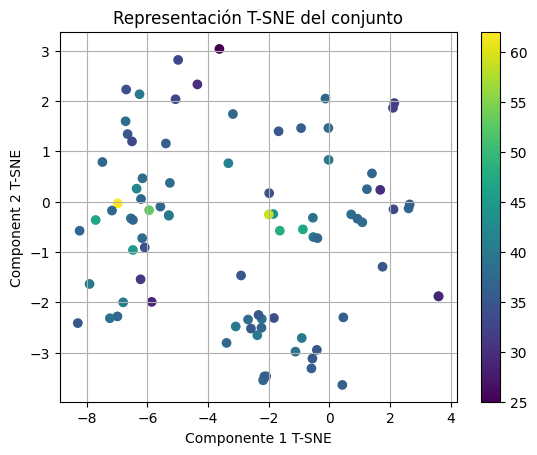

In [ ]:
# importamos T-SNE
from sklearn.manifold import TSNE

# Creamos una instancia de la clase, lo ajustamos a nuestros datos, lo transformamos e indicamos random_state para que el grafic sea siempre igual
tsne = TSNE(n_components=2, random_state=10).fit_transform(reducido_escalado)
#Chequeamos que se haya reducido correctamente la dimension impriendo la cantidad de filas y columnas de ambos datasets
print('Antes T-SNE: {}'.format(reducido_escalado.shape))
print('Despues T-SNE: {}'.format(tsne.shape))

# graficamos los datos, el color de cada punto representa el valor de la casa
plt.scatter(tsne[:,0], tsne[:,1], c=dataset_reducido_ica["ica"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 T-SNE')
plt.ylabel('Component 2 T-SNE')
plt.title('Representación T-SNE del conjunto')
plt.colorbar()
plt.show()

Continuamos haciendo el analisis con UMAP, ya que este ayuda en casos no lineales y con muchas dimensiones

c:\FACULTAD\Tercero\Fundamentos\TPE\ambiente\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Antes de UMAP: (84, 18)
Después de UMAP: (84, 2)


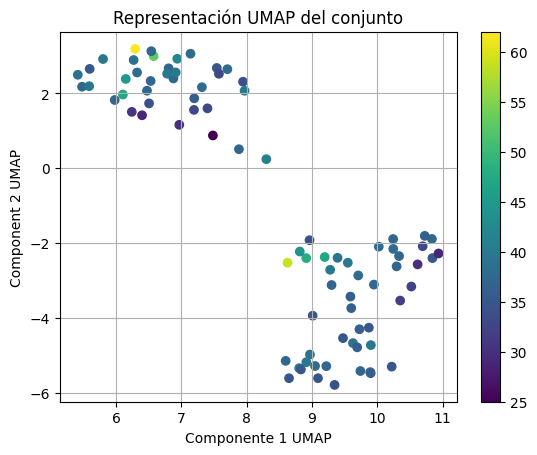

In [ ]:
# importamos umap
import umap

# Creamos una instancia de la clase, lo ajustamos a nuestro datos y lo transformamos
umap = umap.UMAP(n_components=2, random_state = 10).fit_transform(reducido_escalado)
#Chequeamos que se haya reducido correctamente la dimension impriendo la cantidad de filas y columnas de ambos datasets
print('Antes de UMAP: {}'.format(reducido_escalado.shape))
print('Después de UMAP: {}'.format(umap.shape))

# graficamos los datos, el color de cada punto representa el valor de ica
plt.scatter(umap[:,0], umap[:,1], c=dataset_reducido_ica['ica'], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 UMAP')
plt.ylabel('Component 2 UMAP')
plt.title('Representación UMAP del conjunto')
plt.colorbar()
plt.show()

Con calidad del agua (variable categorica)

In [ ]:
dataset_reducido_calidad = dataset[['tem_agua', 'tem_aire', 'od', 'ph', 'colif_fecales_ufc_100ml', 'escher_coli_ufc_100ml', 'enteroc_ufc_100ml', 'nitrato_mg_l', 'nh4_mg_l', 'p_total_l_mg_l', 'fosf_ortofos_mg_l', 'dbo_mg_l', 'dqo_mg_l', 'turbiedad_ntu', 'cr_total_mg_l', 'cd_total_mg_l', 'clorofila_a_ug_l', 'microcistina_ug_l', 'calidad_de_agua']]


scaler = StandardScaler()
calidad_escalado = scaler.fit_transform(dataset_reducido_calidad)

# importamos umap
import umap

# Creamos una instancia de la clase, lo ajustamos a nuestro datos y lo transformamos
umap = umap.UMAP(n_components=2).fit_transform(calidad_escalado)
#Chequeamos que se haya reducido correctamente la dimension impriendo la cantidad de filas y columnas de ambos datasets
print('Antes de UMAP: {}'.format(reducido_escalado.shape))
print('Después de UMAP: {}'.format(umap.shape))

# graficamos los datos, el color de cada punto representa el valor de ica
plt.scatter(umap[:,0], umap[:,1], c=dataset_reducido_calidad['calidad_de_agua'], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 UMAP')
plt.ylabel('Component 2 UMAP')
plt.title('Representación UMAP del conjunto')
plt.colorbar()
plt.show()

ValueError: could not convert string to float: 'Muy deteriorada'